# Exploratory Data Analysis

## Data Loading and Initial Inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# set plot style
plt.style.use('ggplot')
sns.set_palette('deep')

In [4]:
# load datasets
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

In [5]:
# initial inspection
print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (3493, 34)
Test data shape: (500, 33)


In [6]:
# look at train head
train_data.head()

Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                14-02-2009                          84.3   
1      Near Party Hub                29-09-2008                          85.4   
2   Near Business Hub                30-07-2011                          85.0   
3      Near Party Hub                30-11-2008                          85.6   
4      Near Party Hub                22-02-2010                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      Not Specific                           95.8           1  ...   
1  Tier A Celebrity                           85.0           1  ...   
2  Tier A Celebrity                           68.2           1  ...   
3  Tier A Celebrity                           83.6           0  ...   
4  Tier A Celebrity                           76.8           1  ...   

   Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                       10.0                4.0                 NaN   
1                        9.0                NaN                 4.0   
2                        8.0                3.0                 NaN   
3                        9.0                6.0                 NaN   
4                        6.0                NaN                 2.0   

   Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                 NaN                 NaN      8.0      8        6   
1                 NaN                 NaN      5.0      7        7   
2                 NaN                 NaN      7.0     10        5   
3                 NaN                 NaN      7.0      7        4   
4                 NaN                 NaN      NaN      6        2   

   Comfortablility  Privacy  
0                6        6  
1                3        8  
2                2        8  
3                3        5  
4                4        6  

[5 rows x 34 columns]

In [7]:
# check data types and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [8]:
# summary statistics
train_data.describe().T

count          mean           std        min  \
Registration Number            3493.0  6.174700e+04  1.008487e+03    60001.0   
Annual Turnover                3493.0  3.072571e+07  2.165125e+07  3500000.0   
Facebook Popularity Quotient   3394.0  7.793872e+01  9.829169e+00       43.0   
Instagram Popularity Quotient  3437.0  7.440468e+01  1.094033e+01       40.0   
Fire Audit                     3493.0  7.887203e-01  4.082748e-01        0.0   
Liquor License Obtained        3493.0  9.882622e-01  1.077187e-01        0.0   
Situated in a Multi Complex    3493.0  8.081878e-01  3.937825e-01        0.0   
Dedicated Parking              3493.0  8.018895e-01  3.986329e-01        0.0   
Open Sitting Available         3493.0  8.001718e-01  3.999284e-01        0.0   
Resturant Tier                 3444.0  1.926539e+00  2.609297e-01        1.0   
Restaurant Zomato Rating       3493.0  2.696536e+00  7.872713e-01        0.0   
Restaurant City Tier           3493.0  3.014601e-01  4.589577e-01        0.0   
Order Wait Time                3493.0  5.509591e+00  2.854476e+00        1.0   
Staff Responsivness            3493.0  4.538506e+00  1.093832e+00        1.0   
Value for Money                3493.0  4.526482e+00  9.139370e-01        1.0   
Hygiene Rating                 3493.0  4.661895e+00  1.259523e+00        1.0   
Food Rating                    3493.0  7.522760e+00  1.722721e+00        5.0   
Overall Restaurant Rating      3281.0  8.479427e+00  1.287233e+00        6.0   
Live Music Rating              2728.0  4.012830e+00  1.009044e+00        1.0   
Comedy Gigs Rating             1010.0  2.932673e+00  8.595190e-01        1.0   
Value Deals Rating              786.0  3.655216e+00  9.732496e-01        1.0   
Live Sports Rating              205.0  3.590244e+00  9.063515e-01        2.0   
Ambience                       3468.0  6.423010e+00  2.050026e+00        0.0   
Lively                         3493.0  6.874893e+00  1.847131e+00        0.0   
Service                        3493.0  4.546808e+00  1.877063e+00        0.0   
Comfortablility                3493.0  3.231320e+00  1.993050e+00        0.0   
Privacy                        3493.0  6.275122e+00  1.895057e+00        0.0   

                                      25%          50%           75%  \
Registration Number               60874.0     61747.00  6.262000e+04   
Annual Turnover                18000000.0  30000000.00  3.700000e+07   
Facebook Popularity Quotient         72.0        79.00  8.574500e+01   
Instagram Popularity Quotient        66.0        74.05  8.240000e+01   
Fire Audit                            1.0         1.00  1.000000e+00   
Liquor License Obtained               1.0         1.00  1.000000e+00   
Situated in a Multi Complex           1.0         1.00  1.000000e+00   
Dedicated Parking                     1.0         1.00  1.000000e+00   
Open Sitting Available                1.0         1.00  1.000000e+00   
Resturant Tier                        2.0         2.00  2.000000e+00   
Restaurant Zomato Rating              2.0         3.00  3.000000e+00   
Restaurant City Tier                  0.0         0.00  1.000000e+00   
Order Wait Time                       3.0         5.00  8.000000e+00   
Staff Responsivness                   4.0         5.00  5.000000e+00   
Value for Money                       4.0         5.00  5.000000e+00   
Hygiene Rating                        4.0         5.00  6.000000e+00   
Food Rating                           6.0         7.00  9.000000e+00   
Overall Restaurant Rating             7.0         9.00  1.000000e+01   
Live Music Rating                     3.0         4.00  5.000000e+00   
Comedy Gigs Rating                    2.0         3.00  3.000000e+00   
Value Deals Rating                    3.0         4.00  4.000000e+00   
Live Sports Rating                    3.0         4.00  4.000000e+00   
Ambience                              5.0         7.00  8.000000e+00   
Lively                                6.0         7.00  8.00000

## Target Variable Analysis

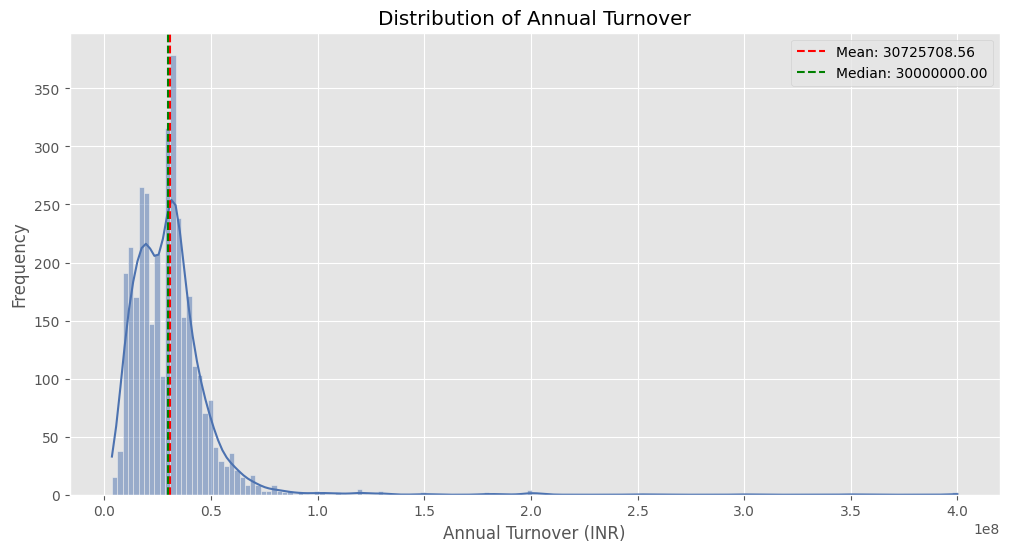

In [9]:
# distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Annual Turnover'], kde=True)
plt.title('Distribution of Annual Turnover')
plt.xlabel('Annual Turnover (INR)')
plt.ylabel('Frequency')
plt.axvline(train_data['Annual Turnover'].mean(), color='r', linestyle='--', label=f"Mean: {train_data['Annual Turnover'].mean():.2f}")
plt.axvline(train_data['Annual Turnover'].median(), color='g', linestyle='--', label=f"Median: {train_data['Annual Turnover'].median():.2f}")
plt.legend()
plt.show()

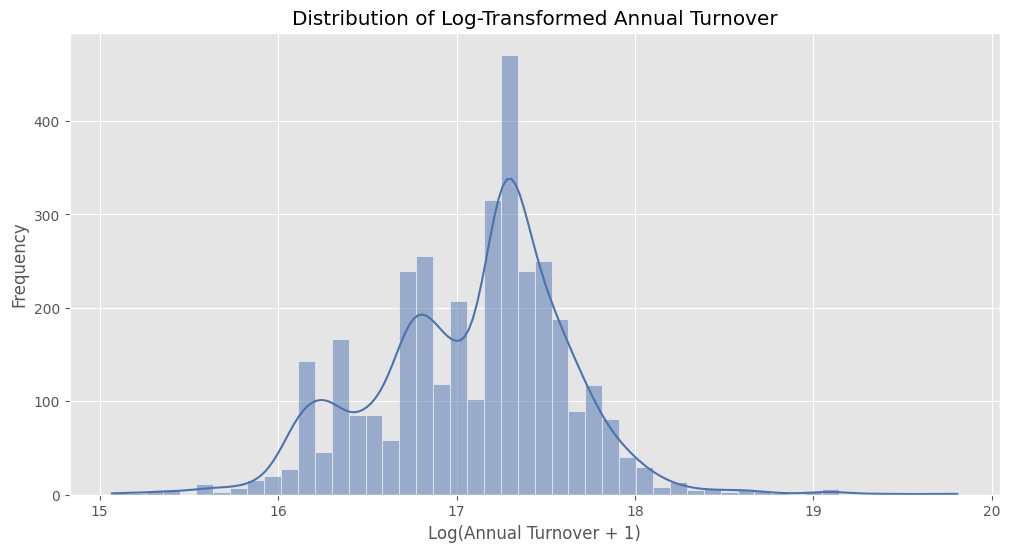

In [10]:
# check if log transformation makes distribution more normal
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(train_data['Annual Turnover']), kde=True)
plt.title('Distribution of Log-Transformed Annual Turnover')
plt.xlabel('Log(Annual Turnover + 1)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# basic statistics
print(train_data['Annual Turnover'].describe())

count    3.493000e+03
mean     3.072571e+07
std      2.165125e+07
min      3.500000e+06
25%      1.800000e+07
50%      3.000000e+07
75%      3.700000e+07
max      4.000000e+08
Name: Annual Turnover, dtype: float64


## Missing Value Analysis

In [12]:
# check missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
print(missing_df)

                               Missing Values  Percentage
Live Sports Rating                       3288   94.131119
Value Deals Rating                       2707   77.497853
Comedy Gigs Rating                       2483   71.085027
Live Music Rating                         765   21.900945
Overall Restaurant Rating                 212    6.069281
Facebook Popularity Quotient               99    2.834240
Instagram Popularity Quotient              56    1.603206
Resturant Tier                             49    1.402806
Ambience                                   25    0.715717


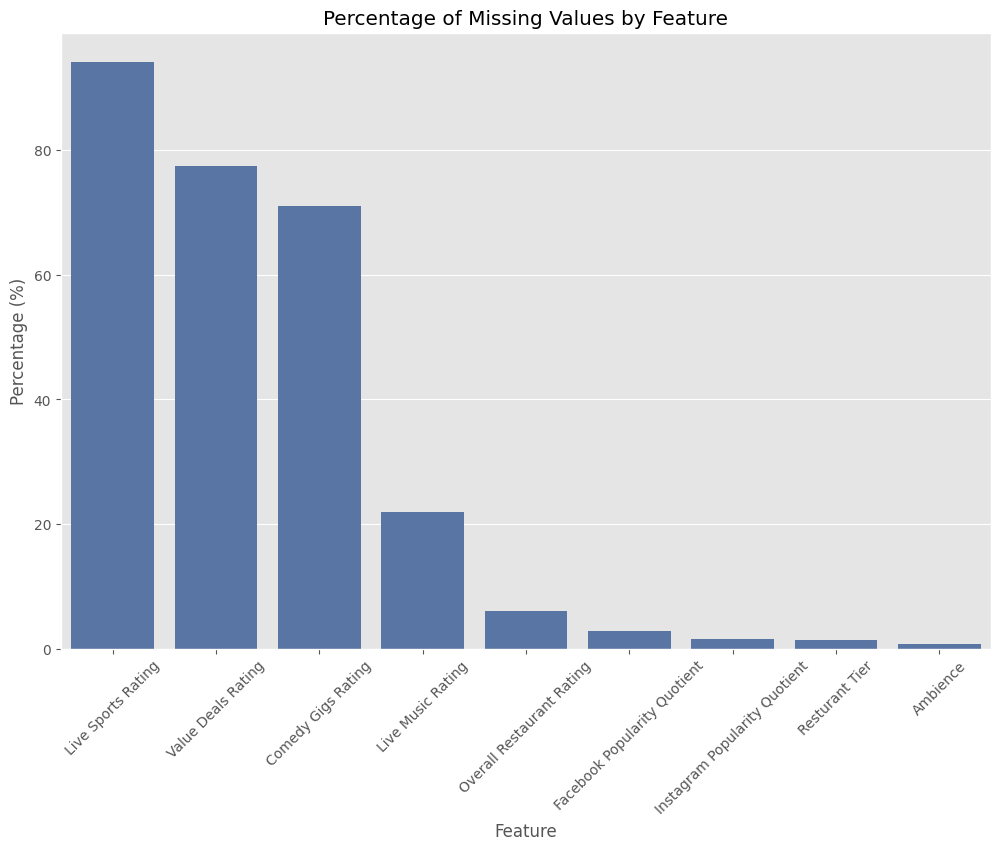

In [13]:
# visualize missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df.index, y='Percentage', data=missing_df)
plt.title('Percentage of Missing Values by Feature')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.xlabel('Feature')
plt.show()

## Categorical Features Analysis

In [14]:
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical features: {categorical_features}')

Categorical features: ['Cuisine', 'City', 'Restaurant Location', 'Opening Day of Restaurant', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']


In [15]:
train_data['City'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

Cuisine

Cuisine value counts:
Cuisine
tibetan,greek          686
welsh,thai             345
tibetan,italian        278
indian,irish           273
british,japanese       271
turkish,nigerian       225
japanese,thai          204
chinese,salvadorian    159
algerian,belgian       155
turkish,sapnish        147
polish,jewish          117
peruvian,cuban         115
swedish,greek           92
irish,belgian           85
algerian,korean         83
cuban,british           81
algerian,algerian       67
hawaiian,latvian        46
british,belgian         40
nigerian,cajun          24
Name: count, dtype: int64


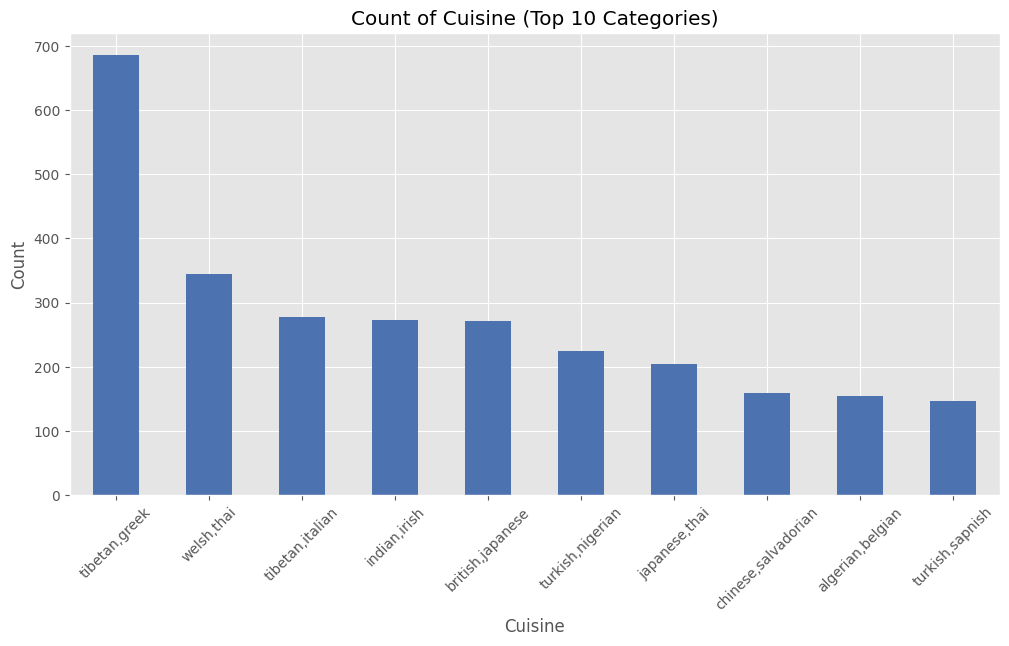

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


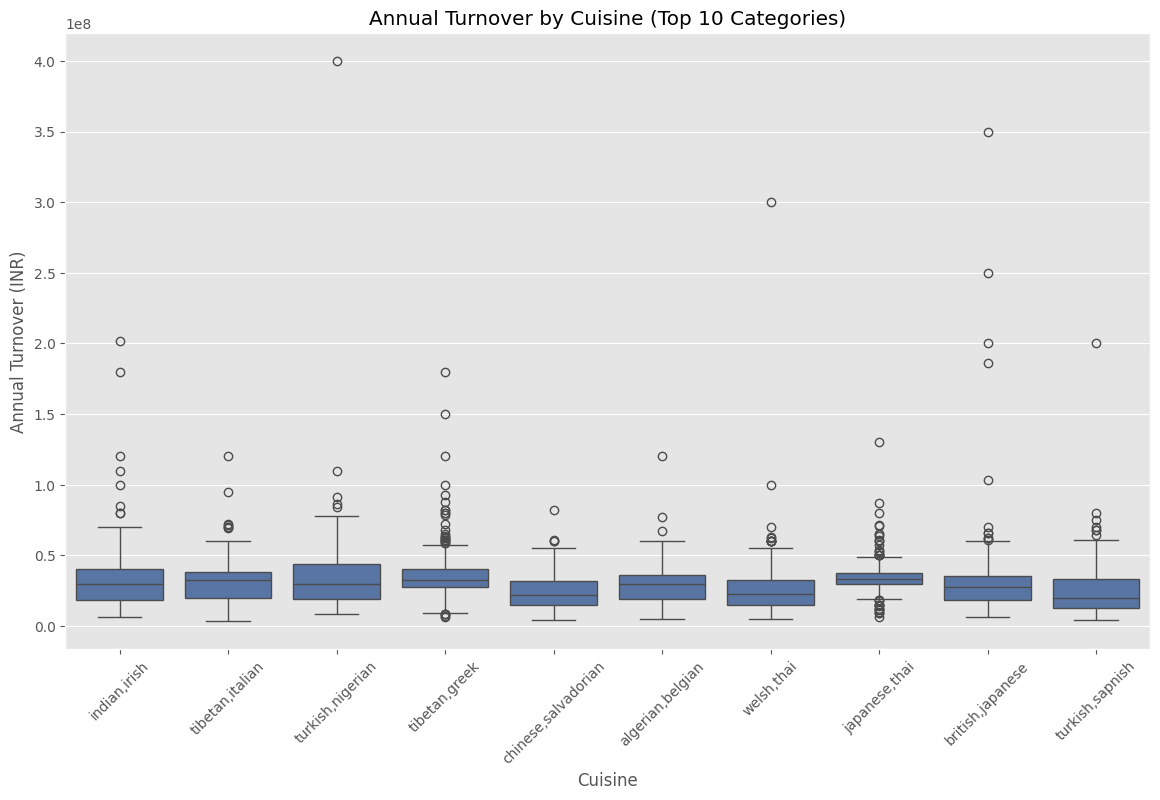

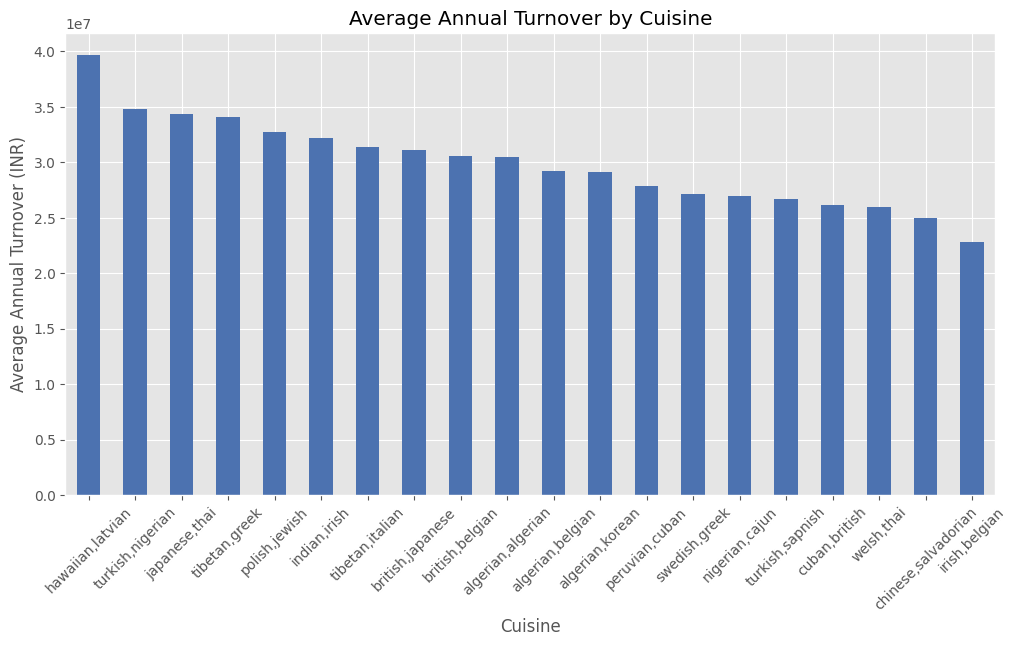

City

City value counts:
City
Bangalore      553
-1             396
Noida          324
Hyderabad      295
Pune           262
              ... 
Miryalaguda      1
 mumbai          1
Dharuhera        1
meerut           1
pondy            1
Name: count, Length: 297, dtype: int64


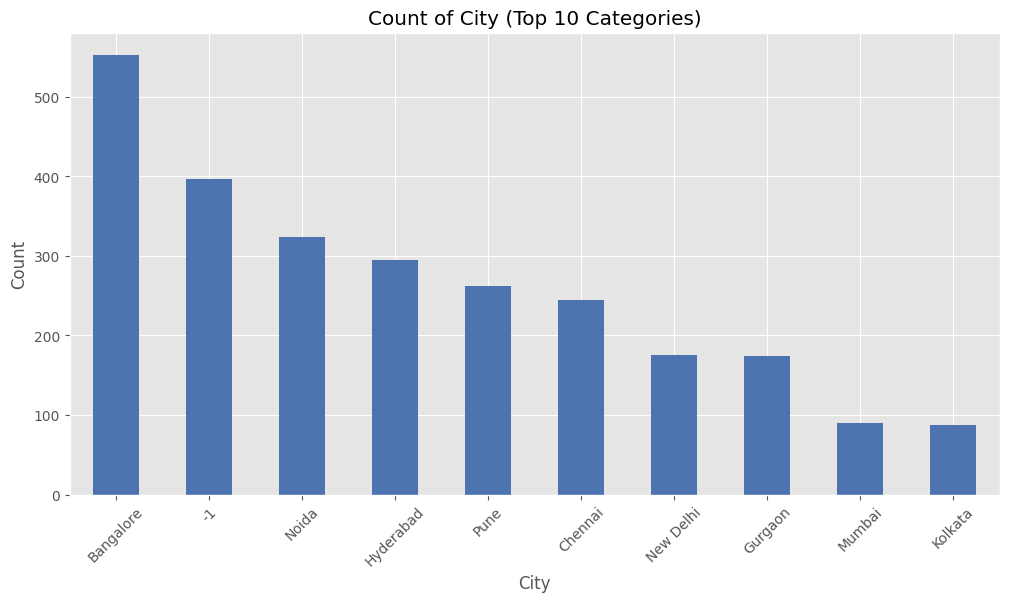

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


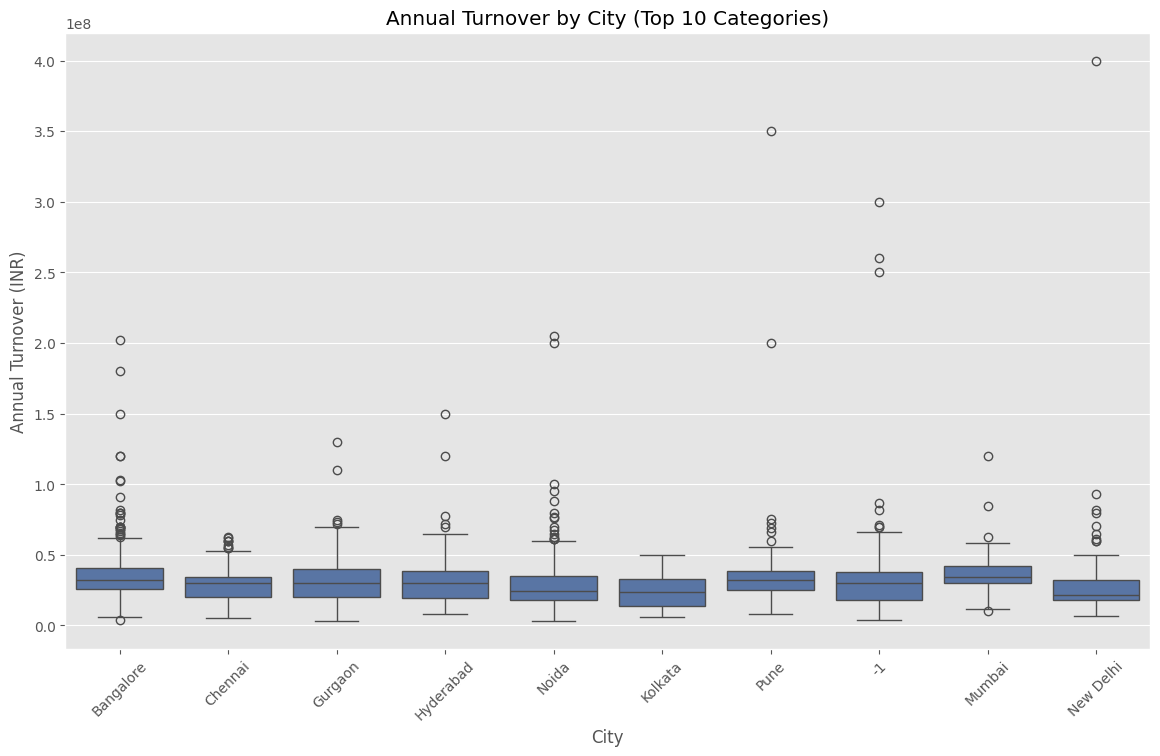

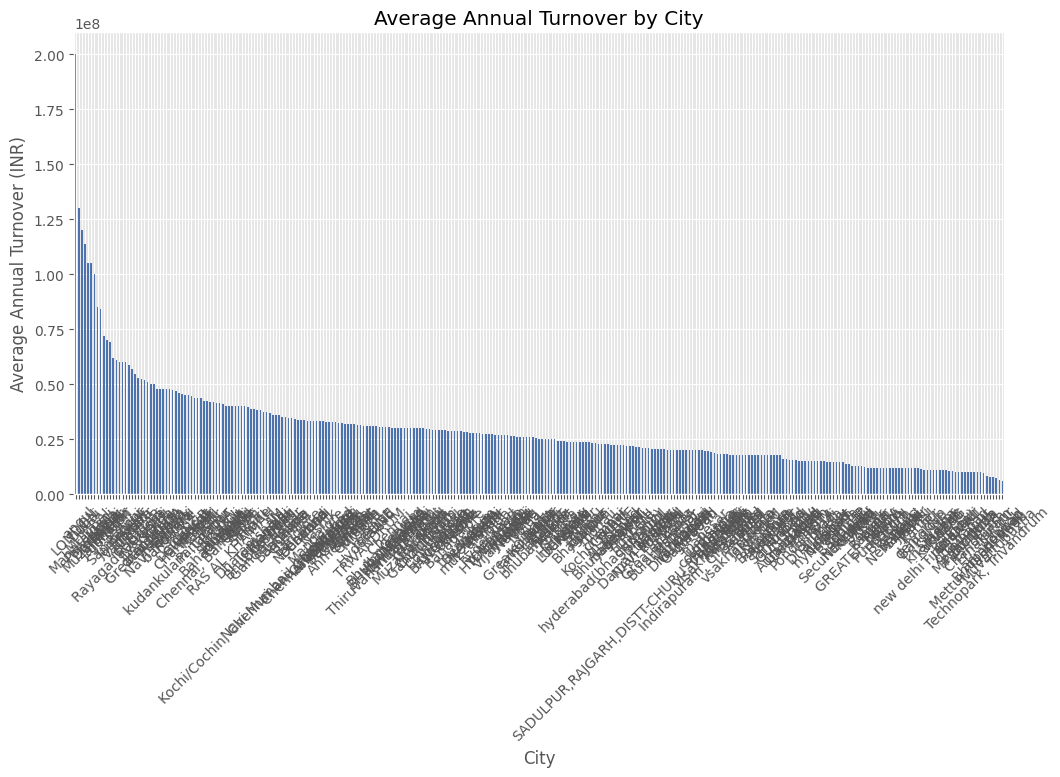

Restaurant Location

Restaurant Location value counts:
Restaurant Location
Near Party Hub       2658
Near Business Hub     835
Name: count, dtype: int64


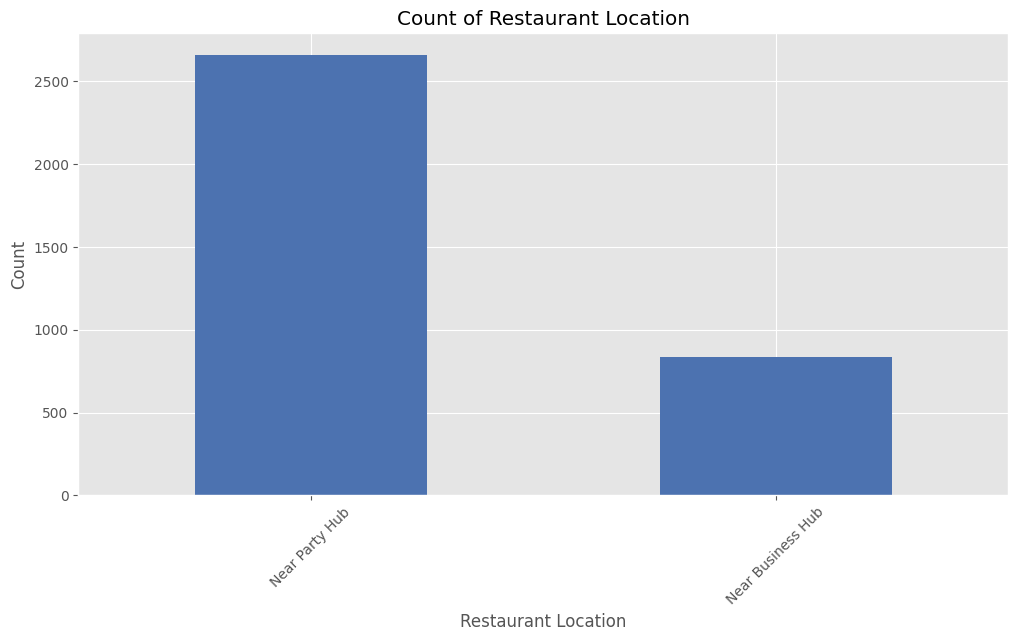

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


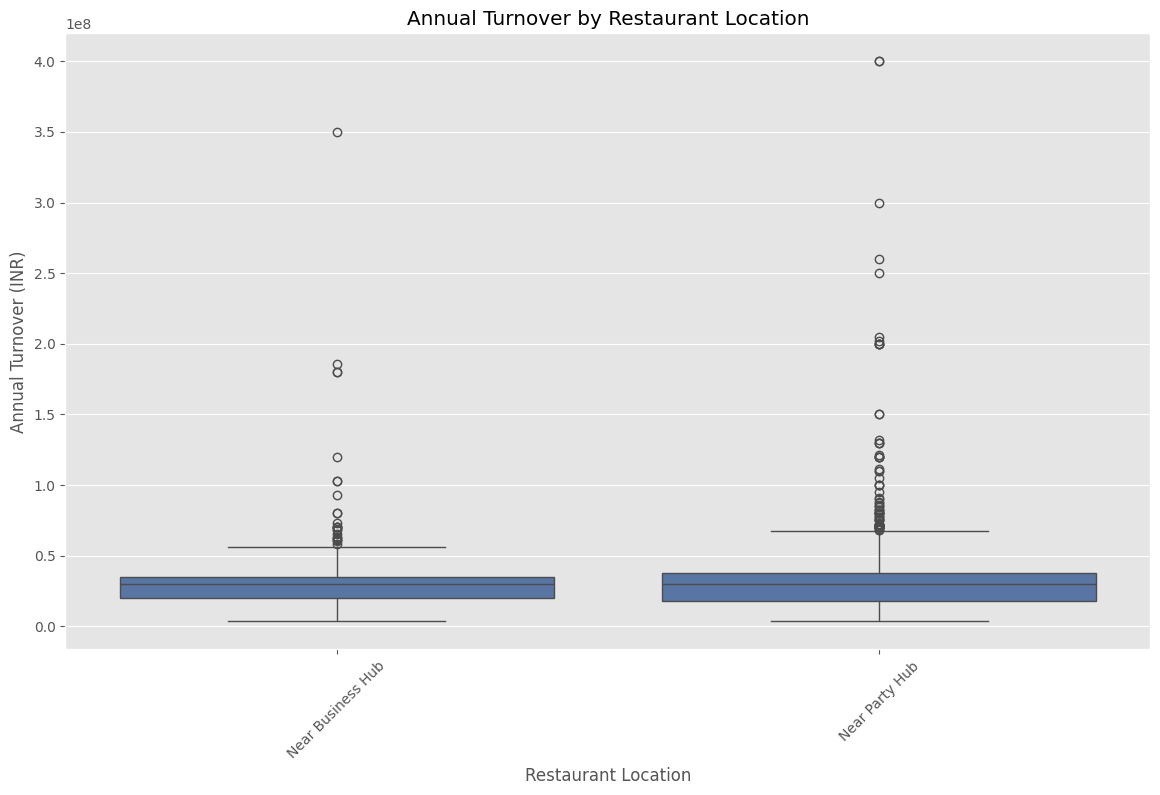

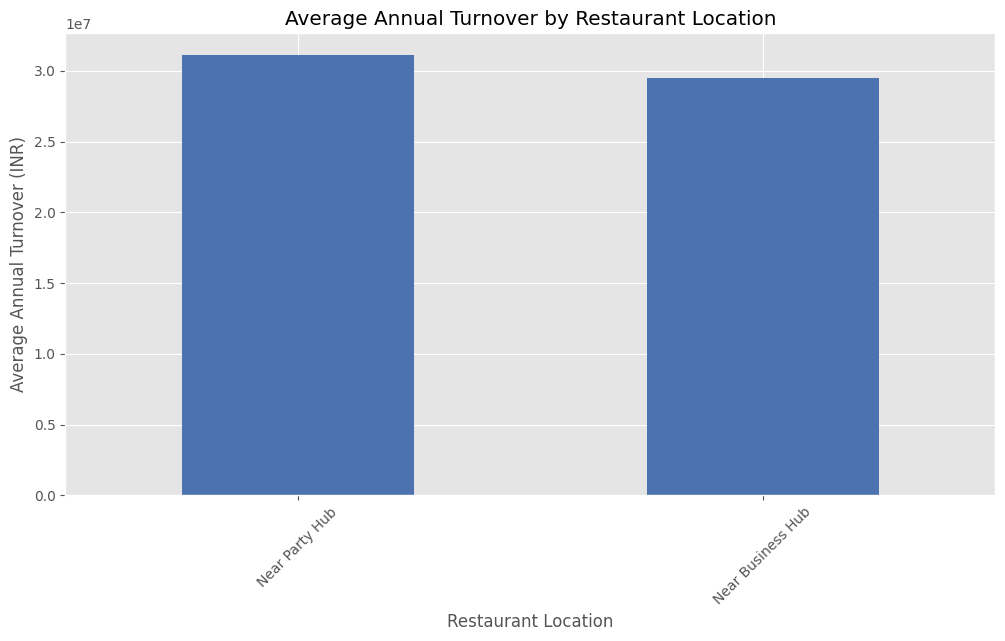

Opening Day of Restaurant

Opening Day of Restaurant value counts:
Opening Day of Restaurant
27-12-2009    10
10-07-2010     9
08-12-2010     8
05-06-2010     7
29-04-2010     7
              ..
27-07-2005     1
21-02-2006     1
14-02-2010     1
02-04-2008     1
15-03-2007     1
Name: count, Length: 1778, dtype: int64


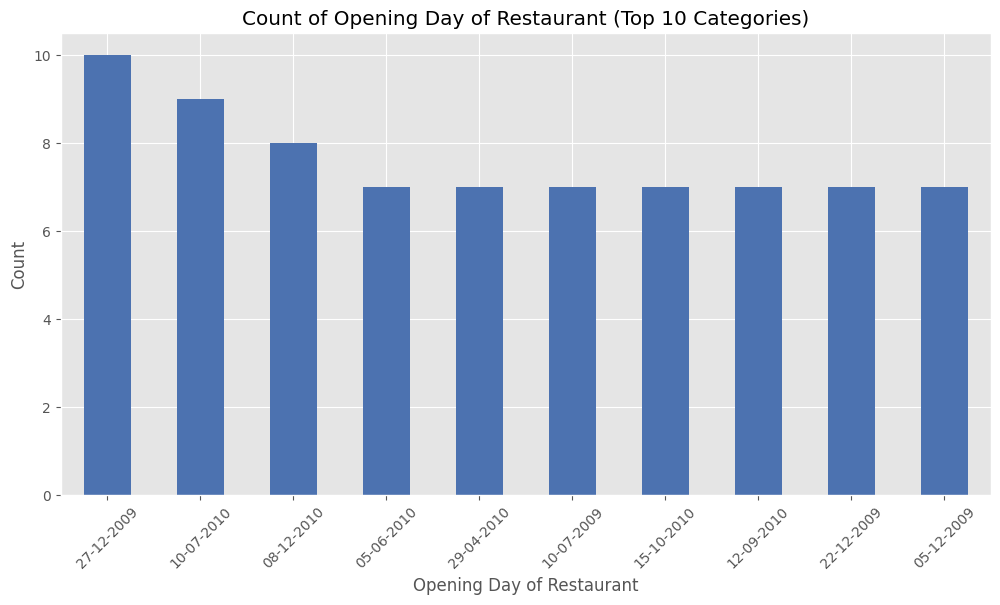

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


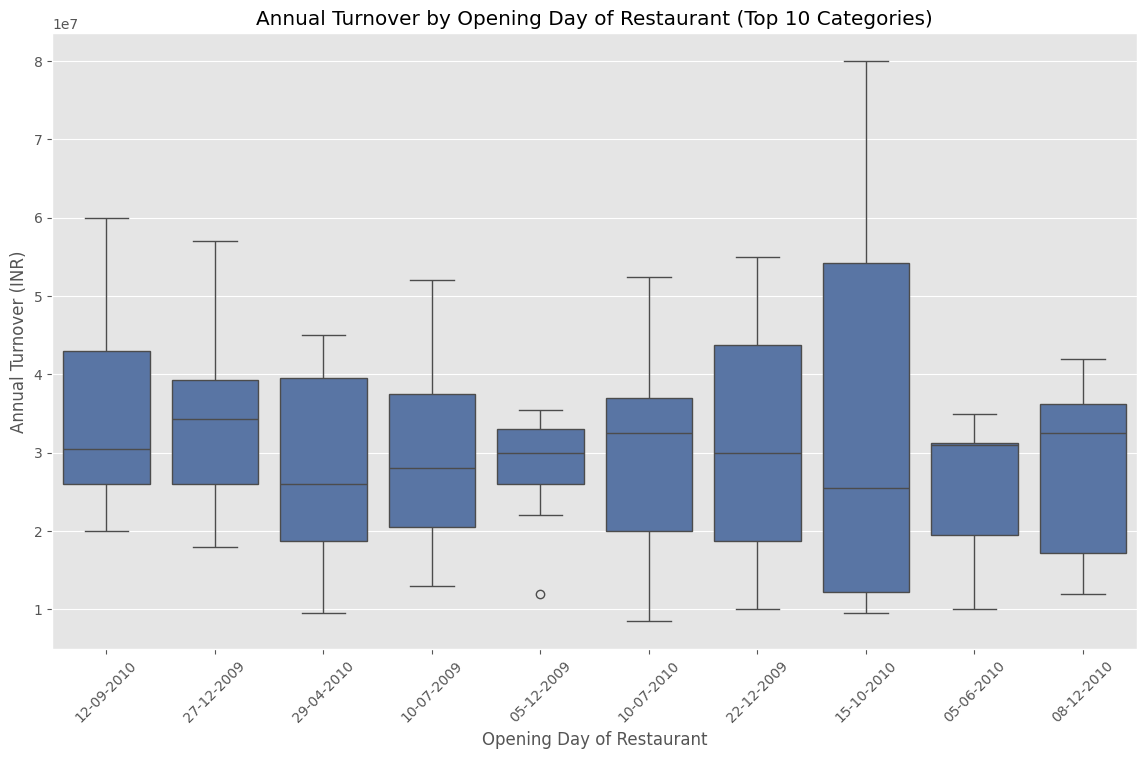

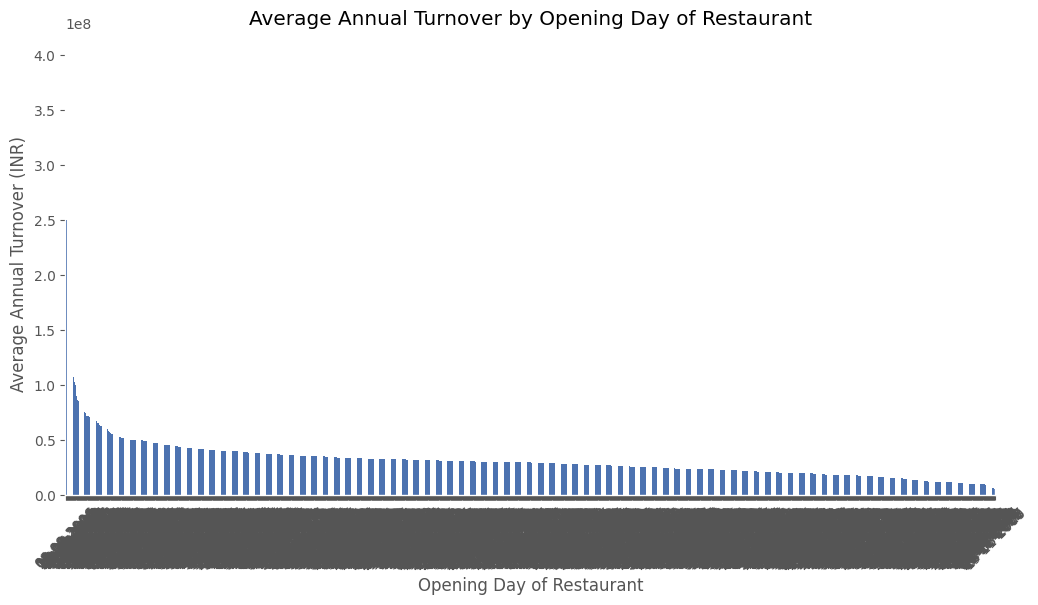

Endorsed By

Endorsed By value counts:
Endorsed By
Not Specific        1961
Tier A Celebrity    1500
Local Celebrity       32
Name: count, dtype: int64


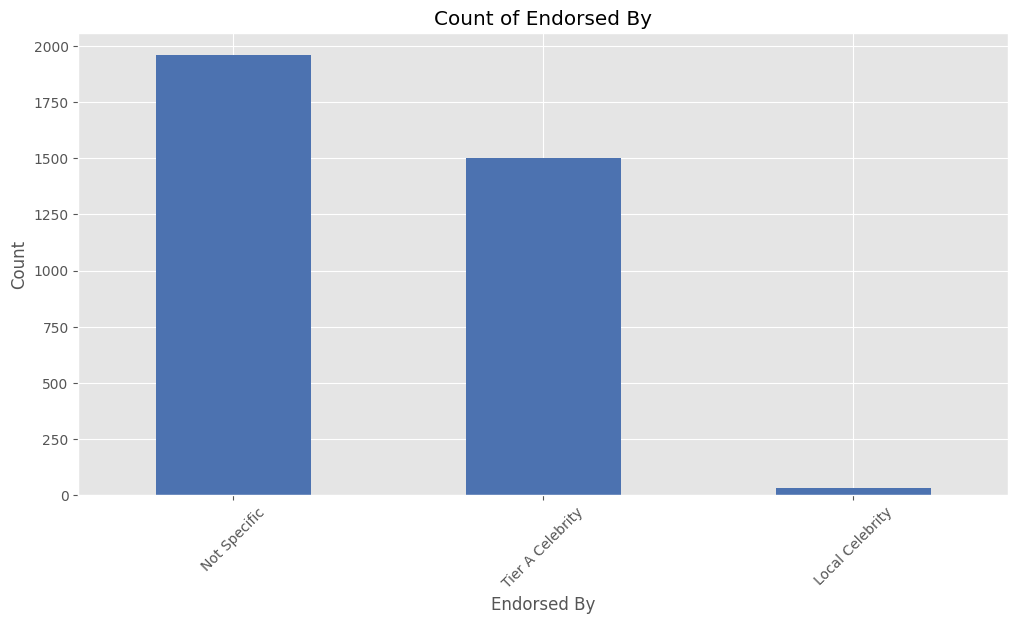

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


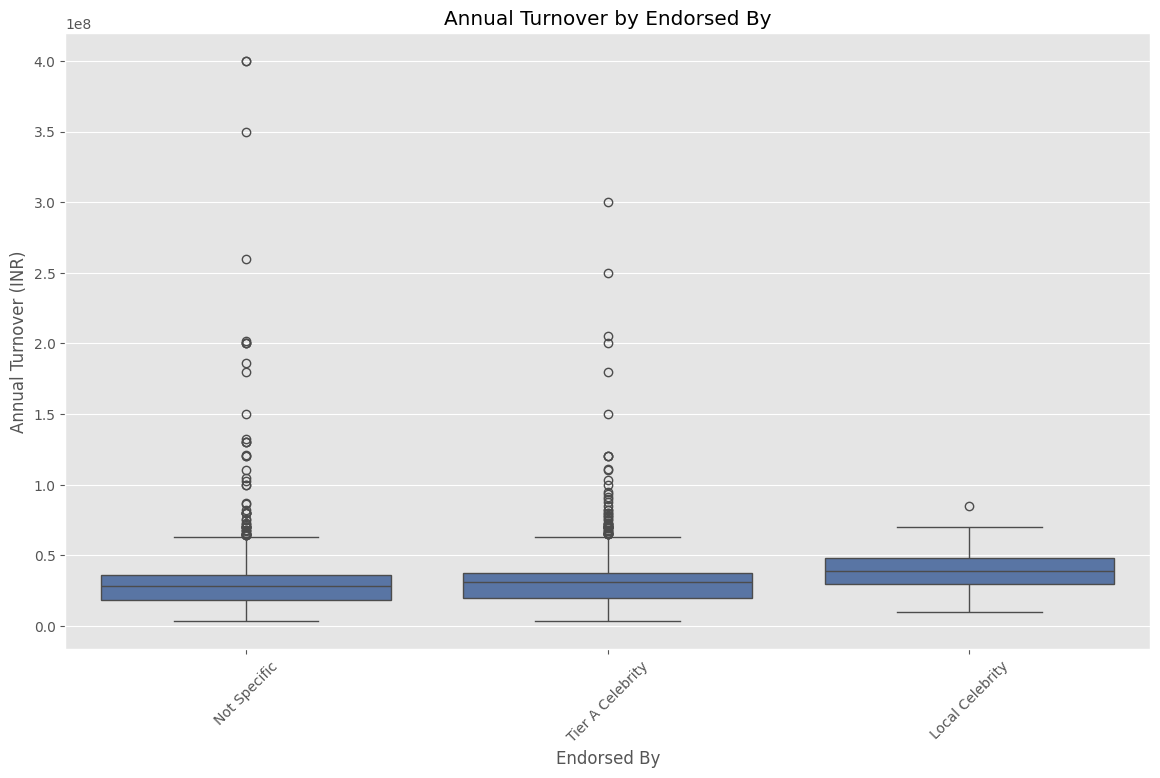

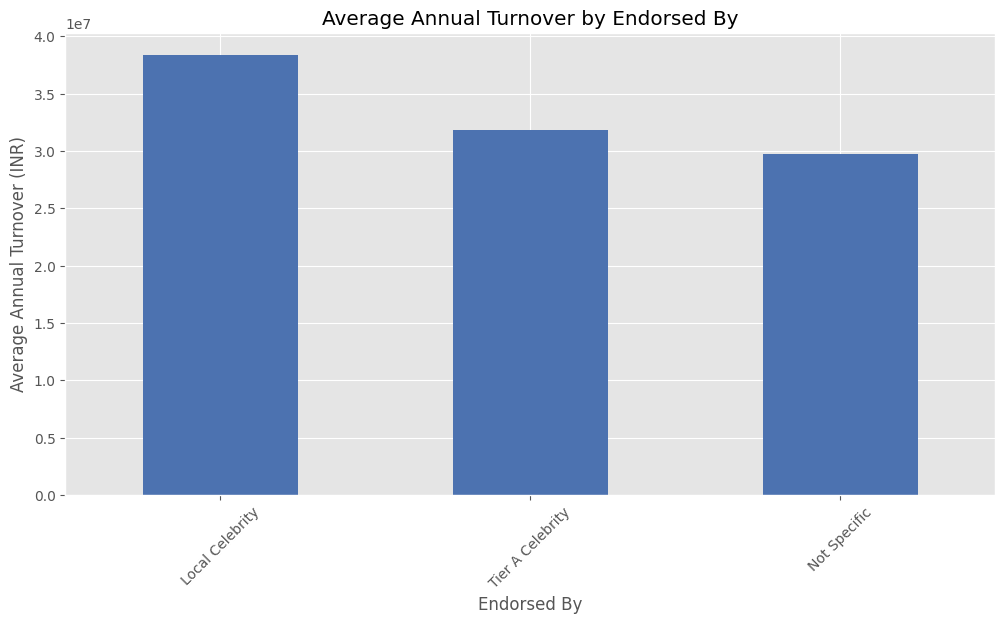

Restaurant Type

Restaurant Type value counts:
Restaurant Type
Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: count, dtype: int64


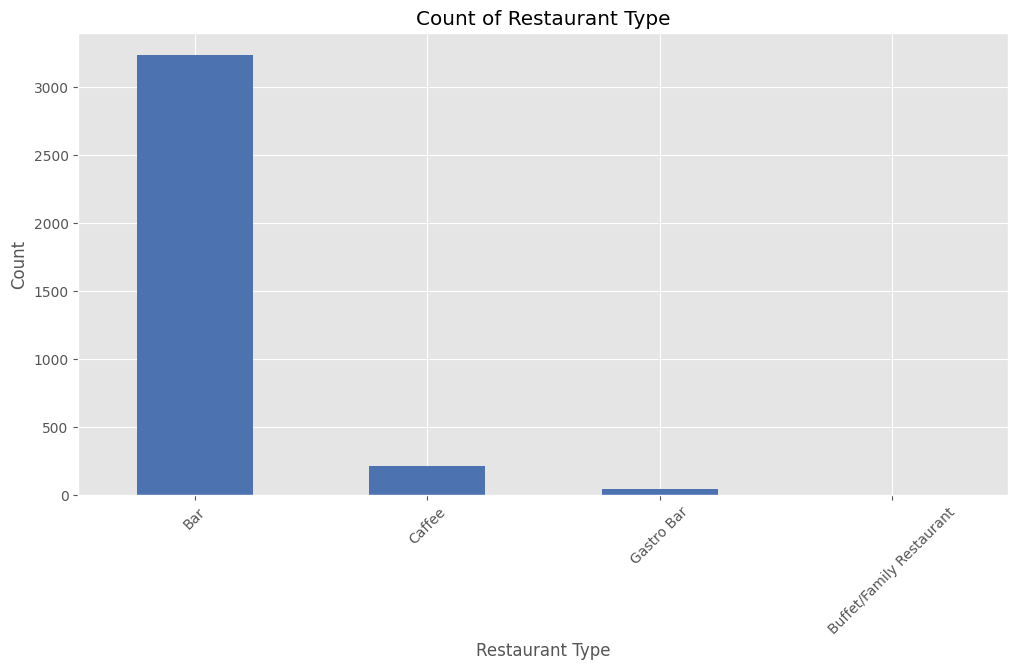

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


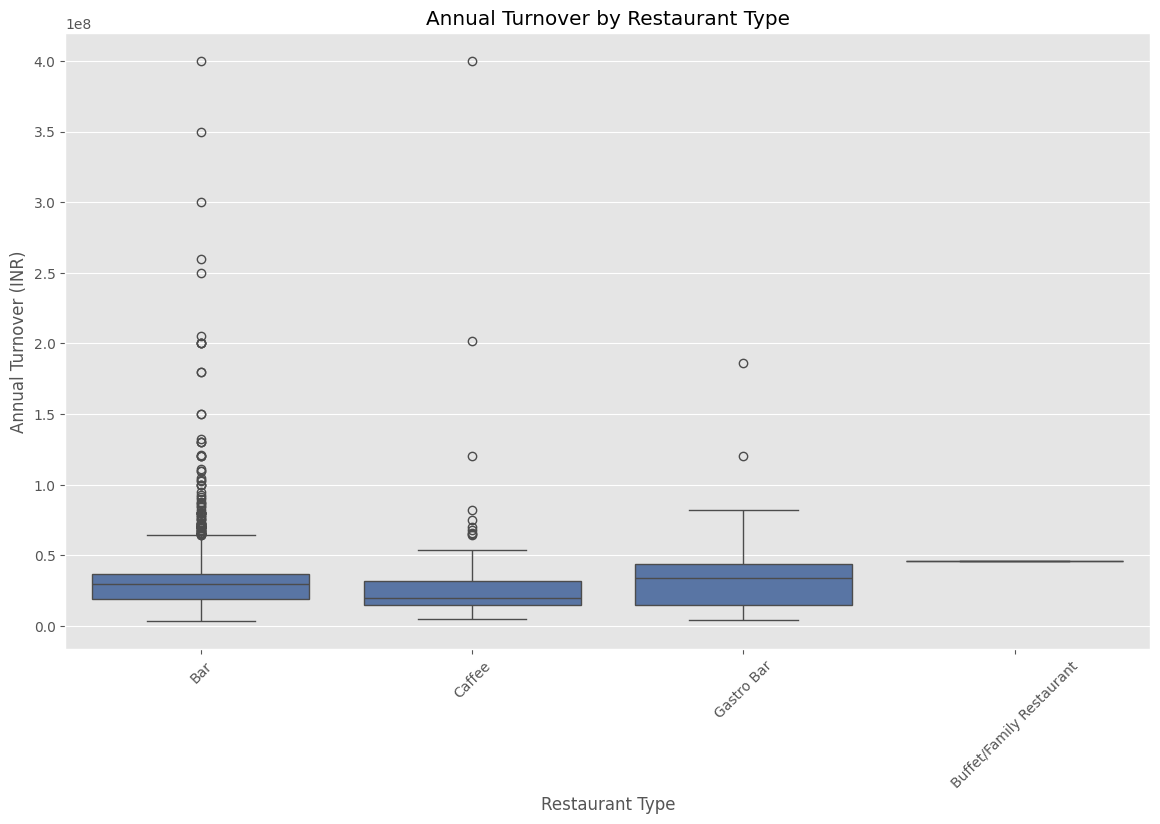

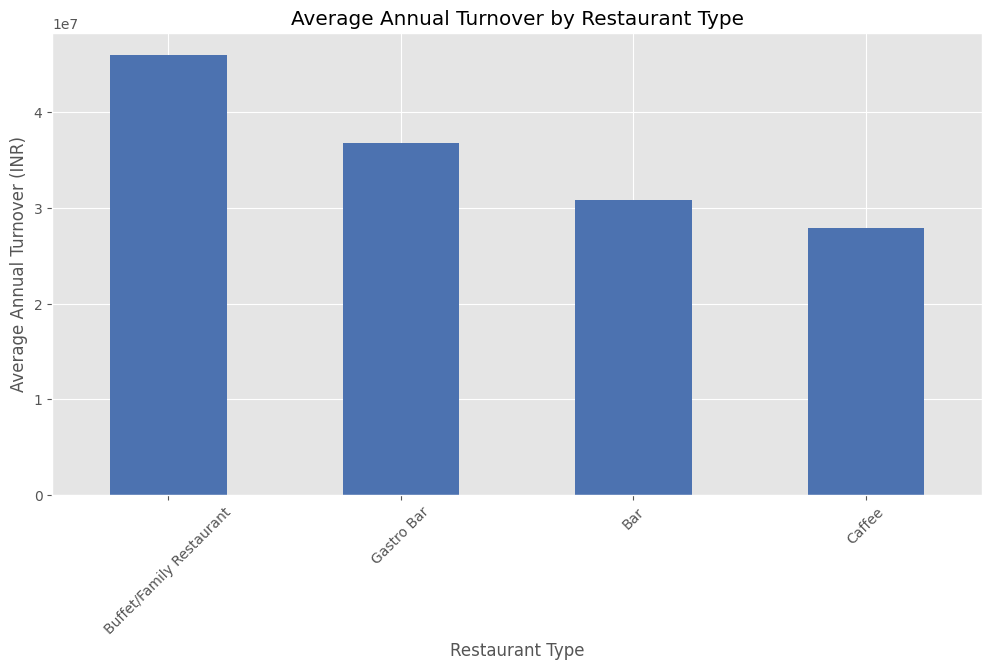

Restaurant Theme

Restaurant Theme value counts:
Restaurant Theme
Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: count, dtype: int64


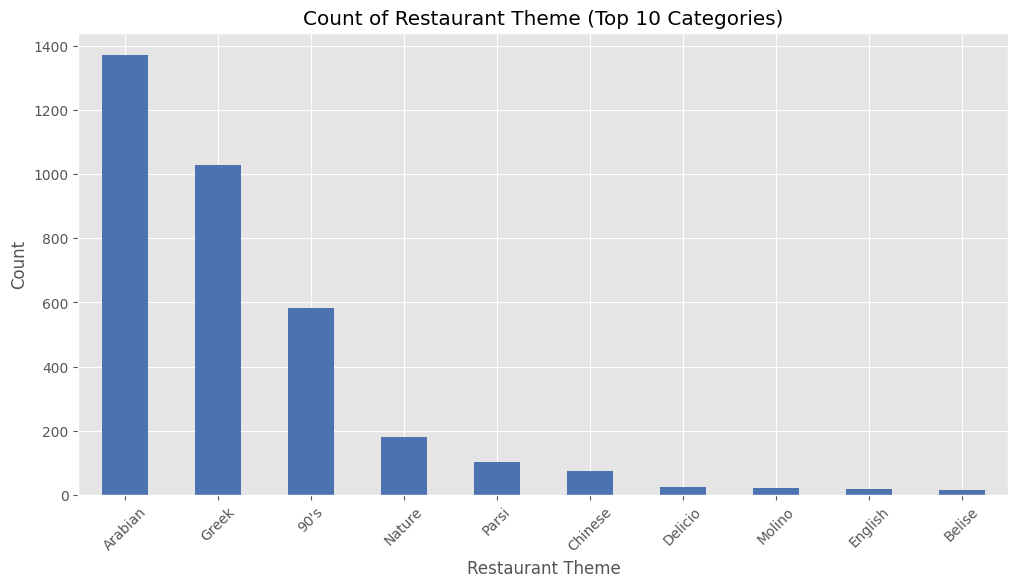

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


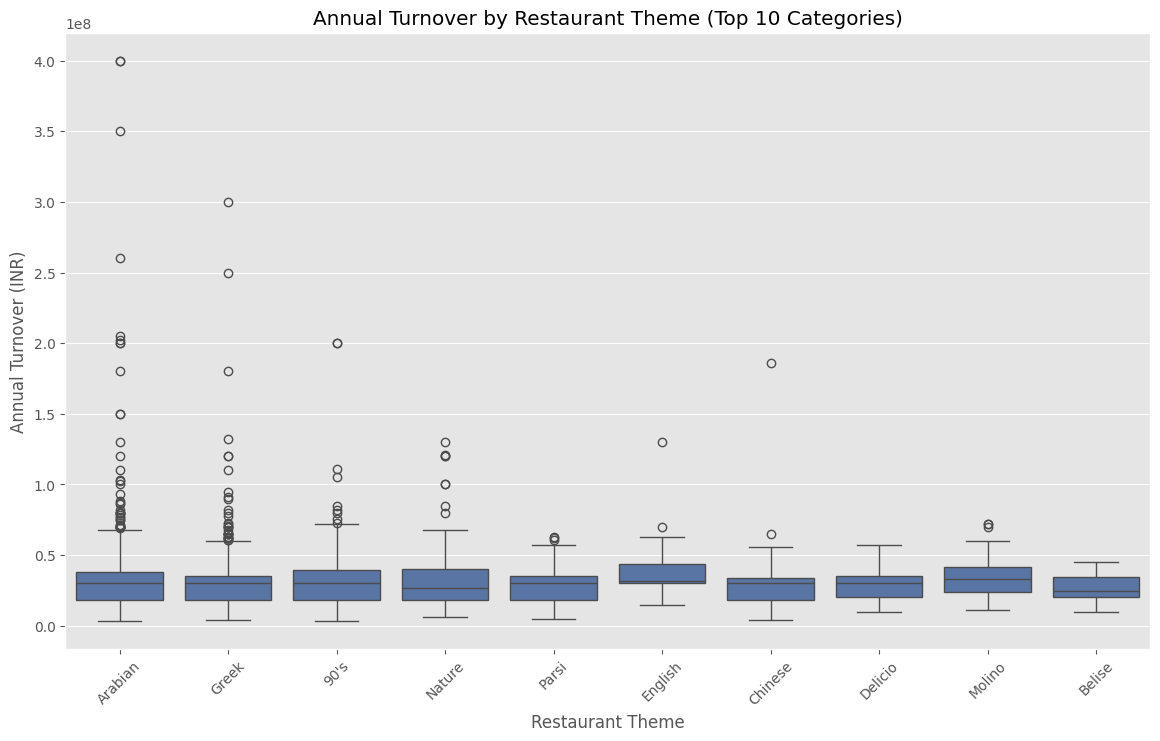

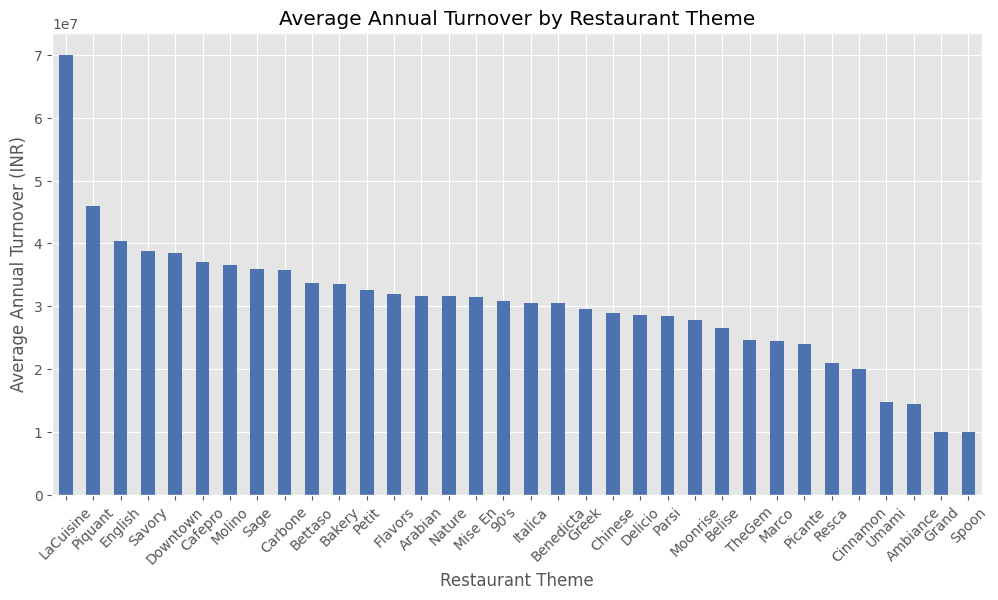

In [16]:
# for each categorical feature
for feature in categorical_features:
    print("=" * 50)
    print(f'{feature}')
    print("=" * 50)

    # count of each category
    value_counts = train_data[feature].value_counts()
    print(f'\n{feature} value counts:')
    print(value_counts)

    # top 10 categories for features with many categories
    if len(value_counts) > 10:
        plt.figure(figsize=(12, 6))
        train_data[feature].value_counts().nlargest(10).plot(kind='bar')
        plt.title(f'Count of {feature} (Top 10 Categories)')
    else:
        plt.figure(figsize=(12, 6))
        train_data[feature].value_counts().plot(kind='bar')
        plt.title(f'Count of {feature}')

    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # relationship with target variable
    plt.figure(figsize=(14, 8))
    # for features with many categories, show only top 10
    if len(value_counts) > 10:
        top_categories = value_counts.nlargest(10).index
        filtered_data = train_data[train_data[feature].isin(top_categories)]
        sns.boxplot(x=feature, y='Annual Turnover', data=filtered_data)
        plt.title(f'Annual Turnover by {feature} (Top 10 Categories)')
    else:
        sns.boxplot(x=feature, y='Annual Turnover', data=train_data)
        plt.title(f'Annual Turnover by {feature}')

    plt.xticks(rotation=45)
    plt.ylabel('Annual Turnover (INR)')
    plt.show()

    # average annual turnover by category
    avg_turnover = train_data.groupby(feature)['Annual Turnover'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    avg_turnover.plot(kind='bar')
    plt.title(f'Average Annual Turnover by {feature}')
    plt.ylabel('Average Annual Turnover (INR)')
    plt.xticks(rotation=45)
    plt.show()

## Numerical Features Analysis

In [17]:
# indentifty numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['Registration Number', 'Annual Turnover']]
print(f'Numerical features: {numerical_features}')

Numerical features: ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy']


Facebook Popularity Quotient


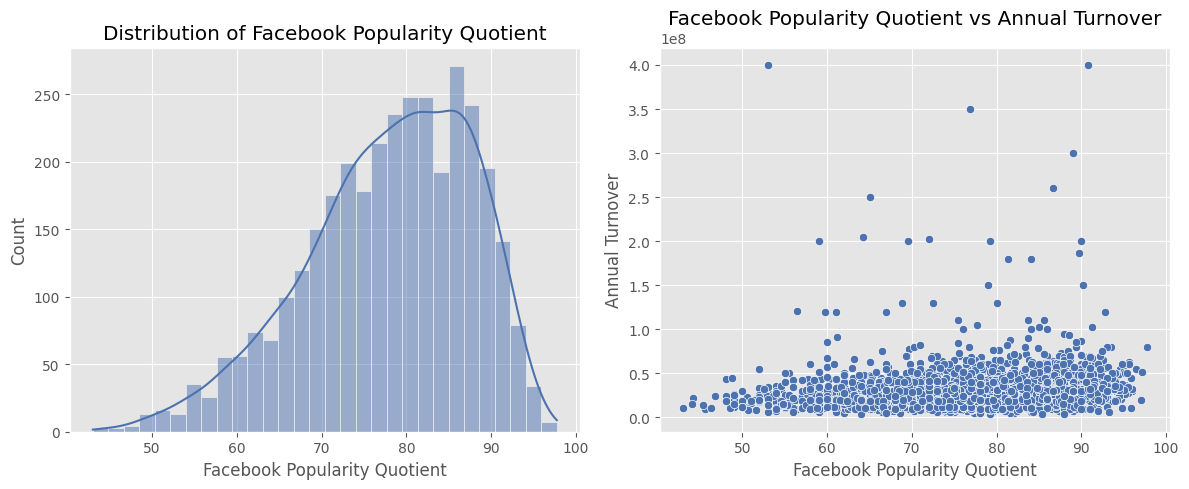

Instagram Popularity Quotient


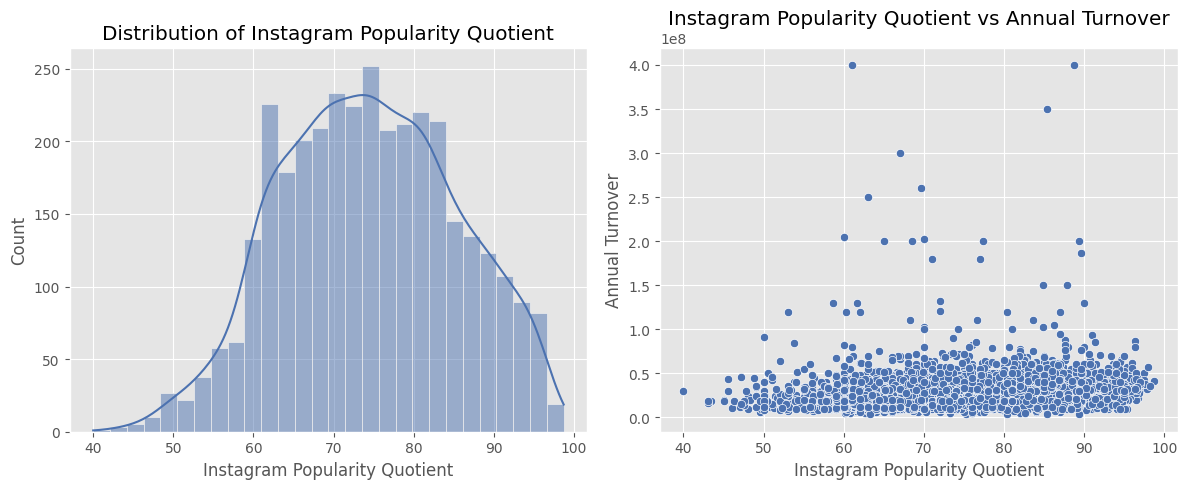

Fire Audit


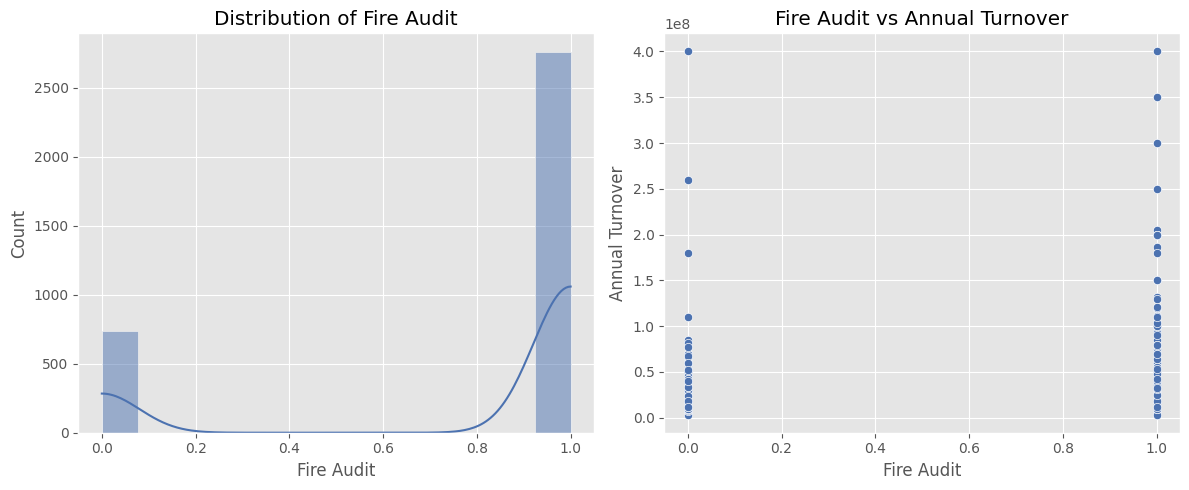

Liquor License Obtained


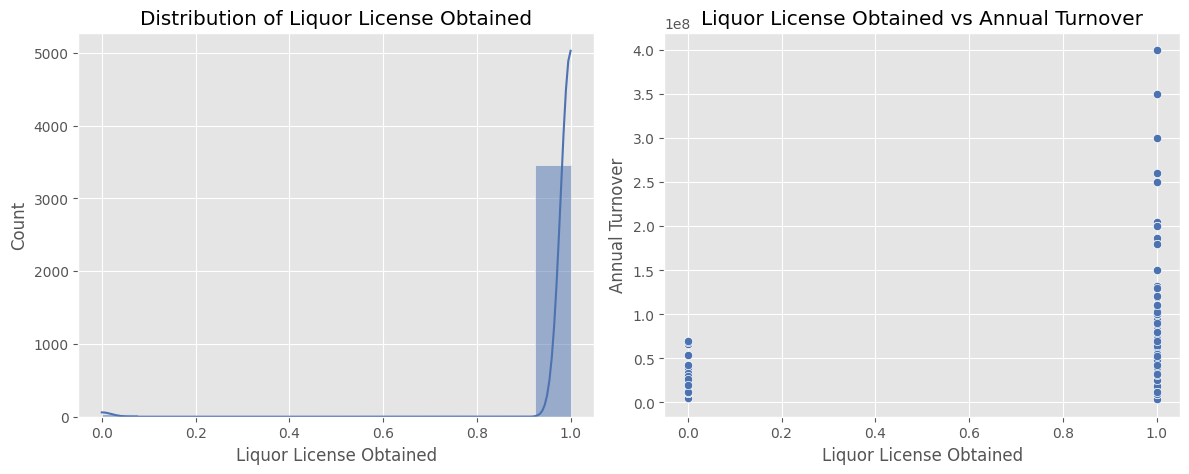

Situated in a Multi Complex


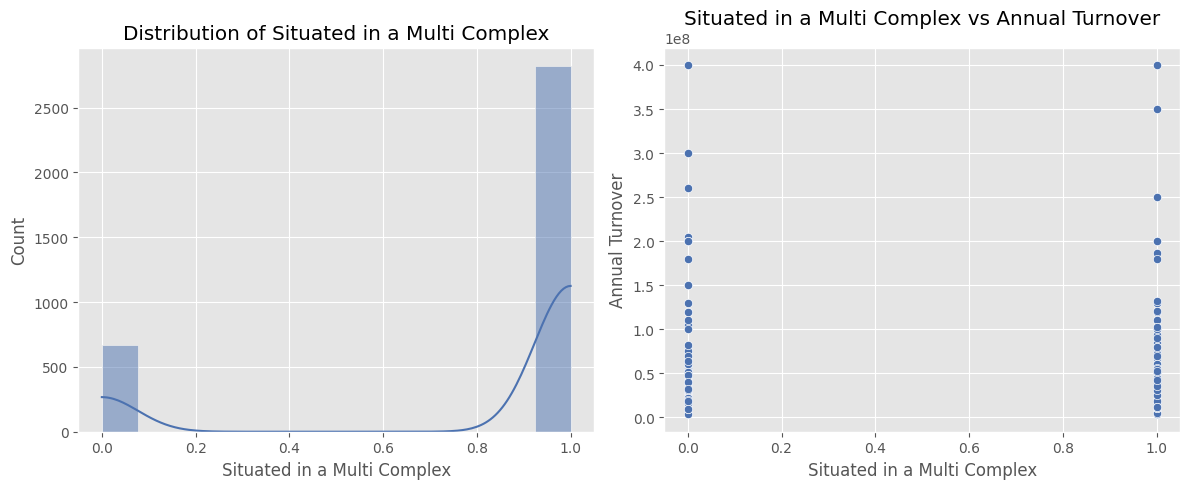

Dedicated Parking


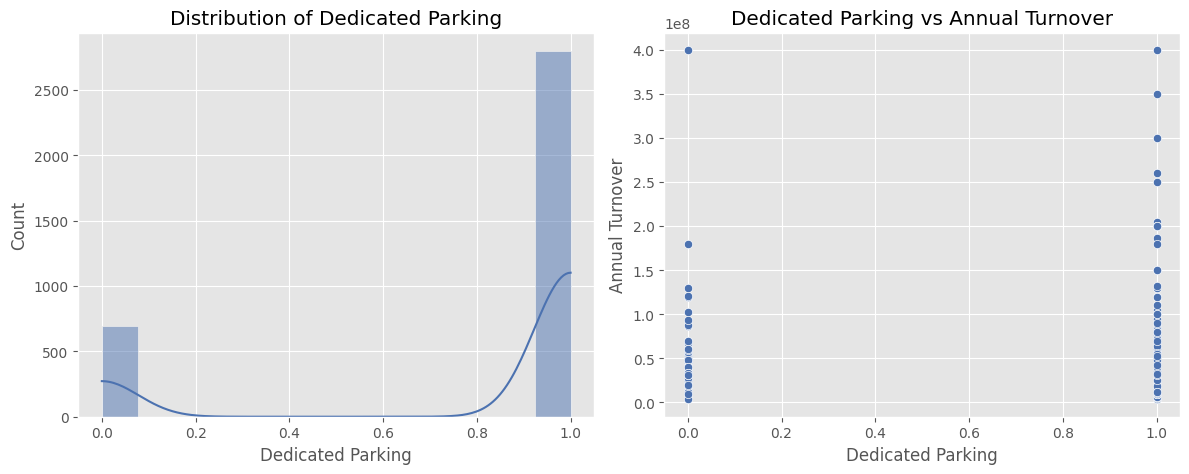

Open Sitting Available


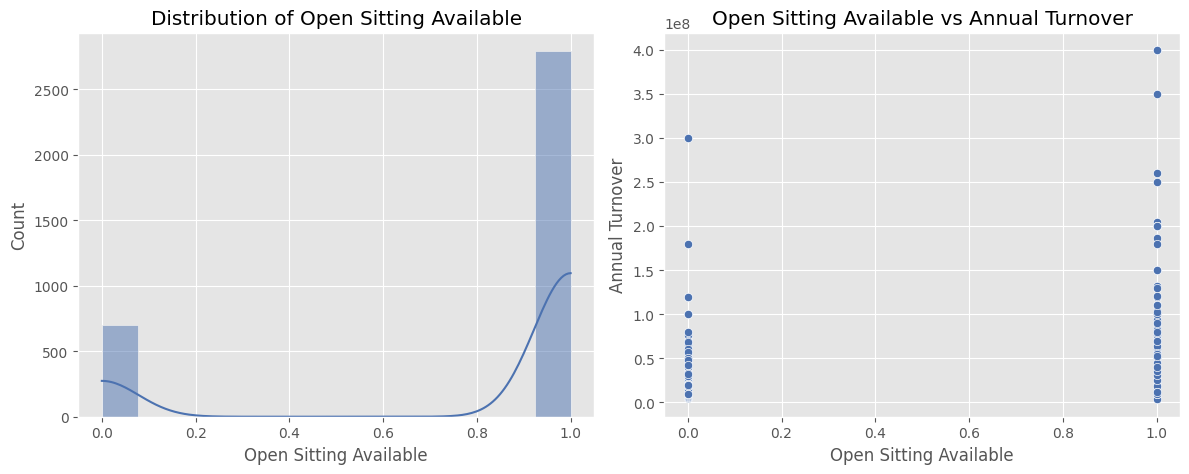

Resturant Tier


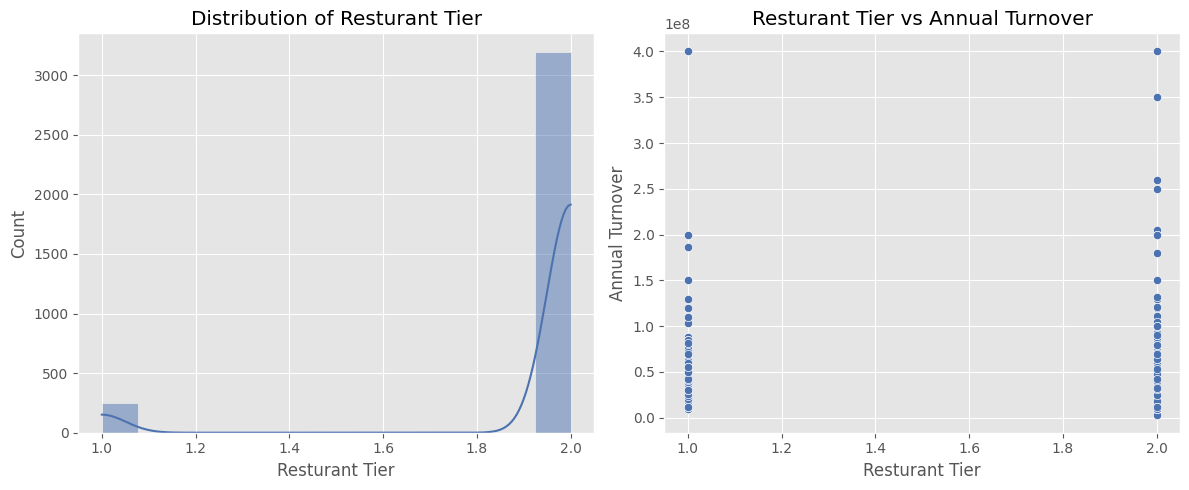

Restaurant Zomato Rating


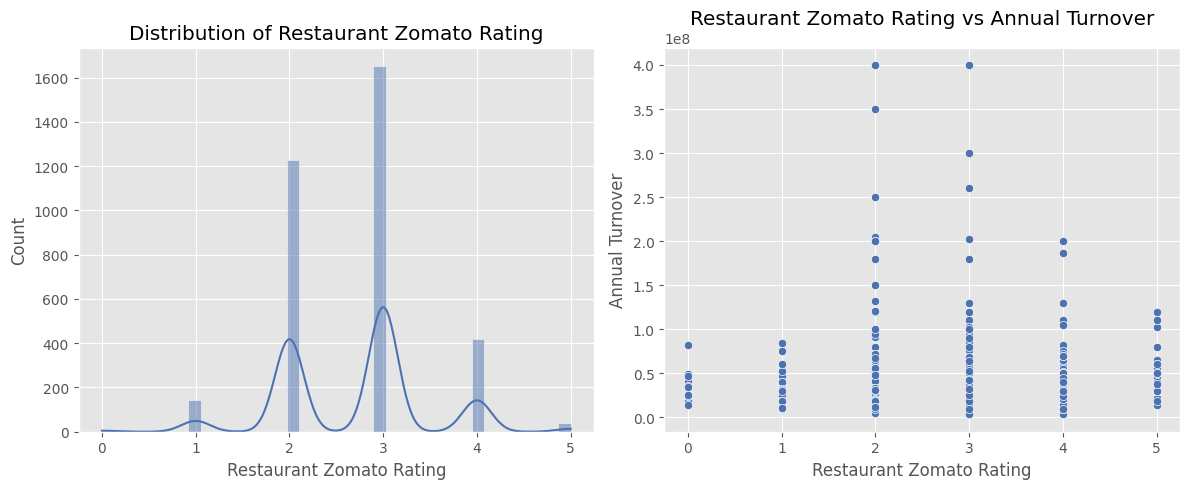

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


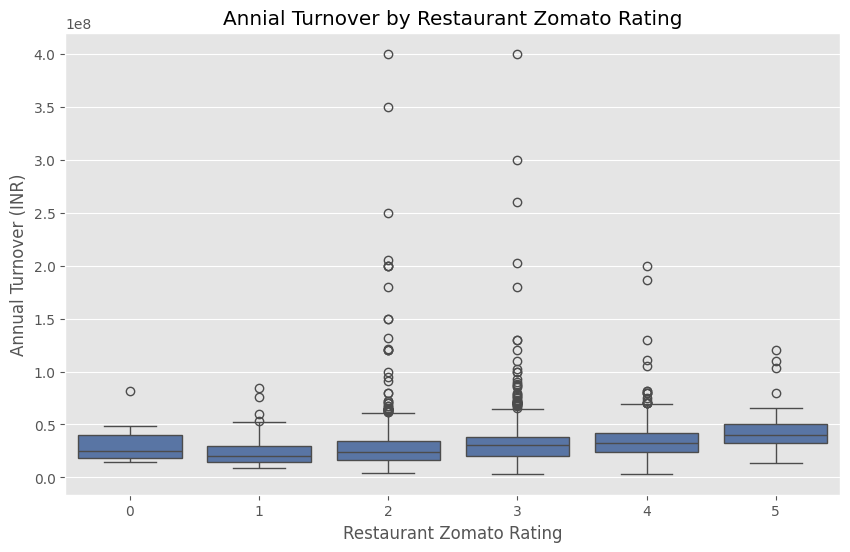

Restaurant City Tier


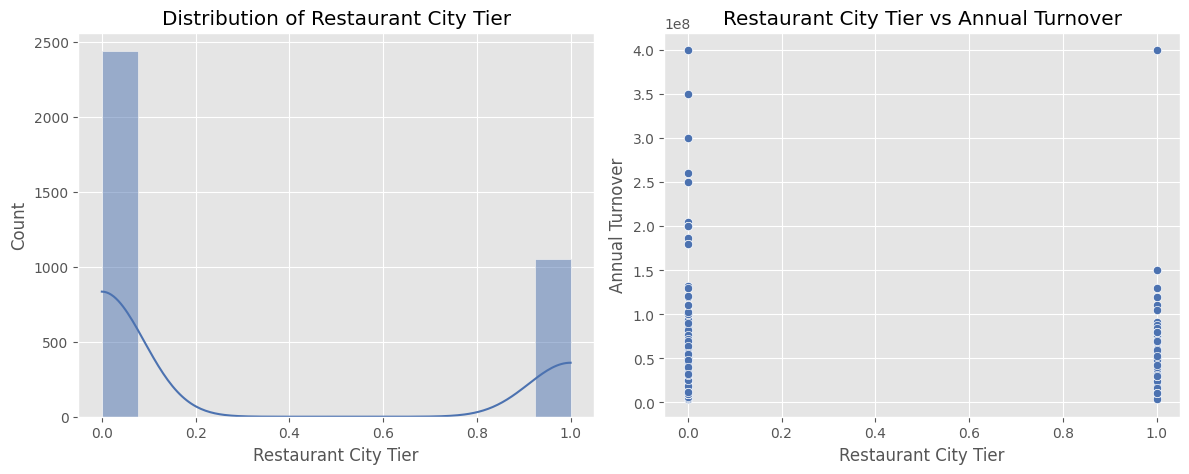

Order Wait Time


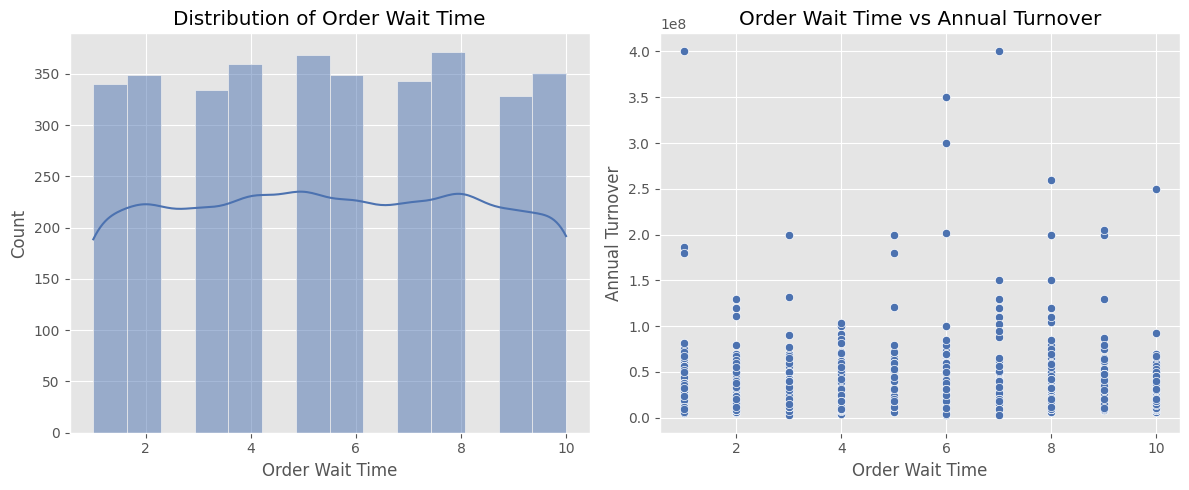

Staff Responsivness


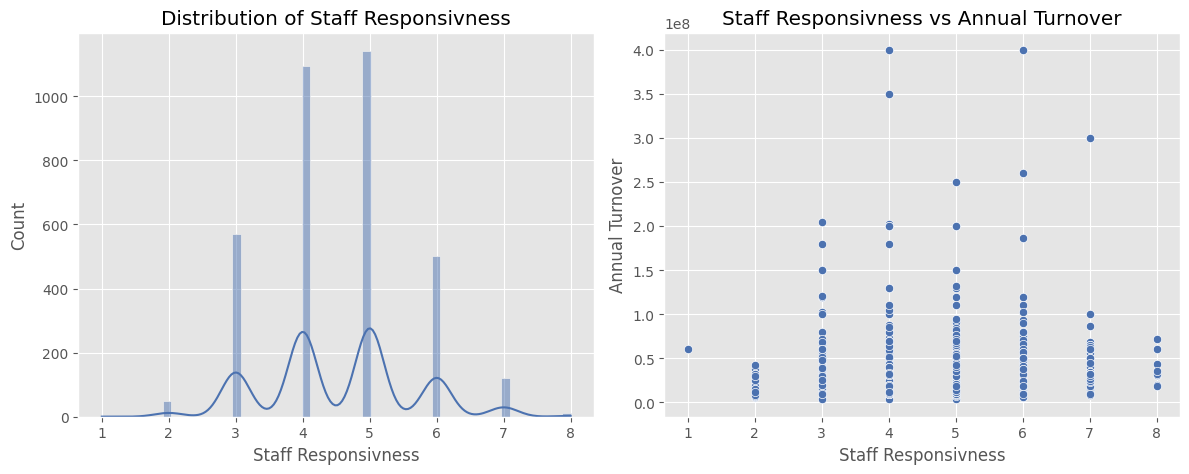

Value for Money


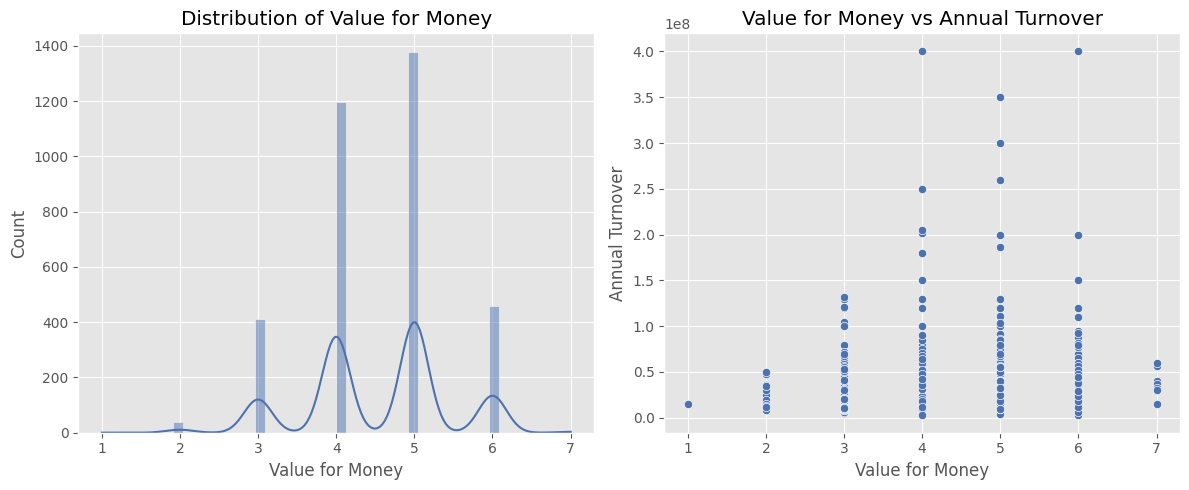

Hygiene Rating


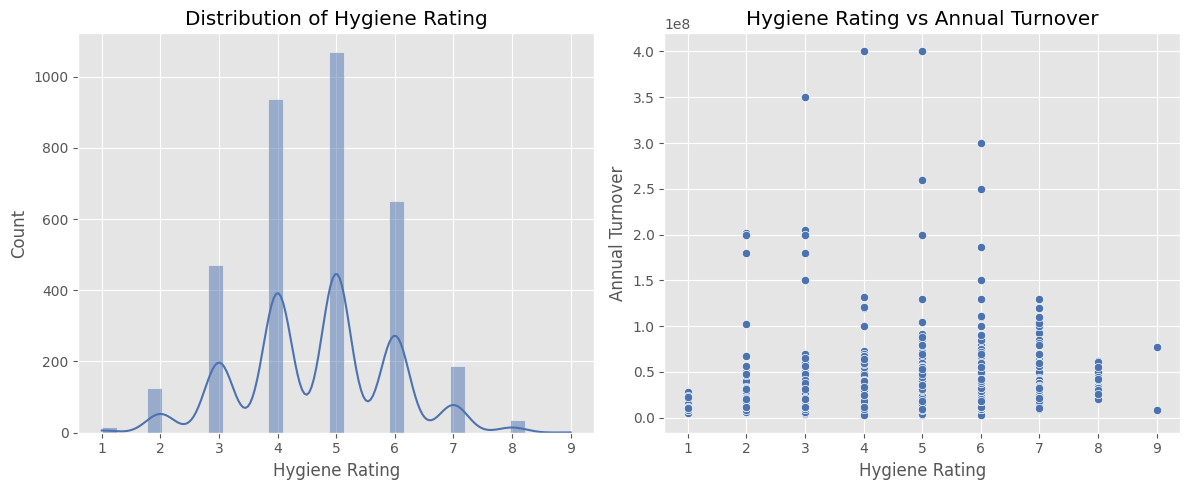

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


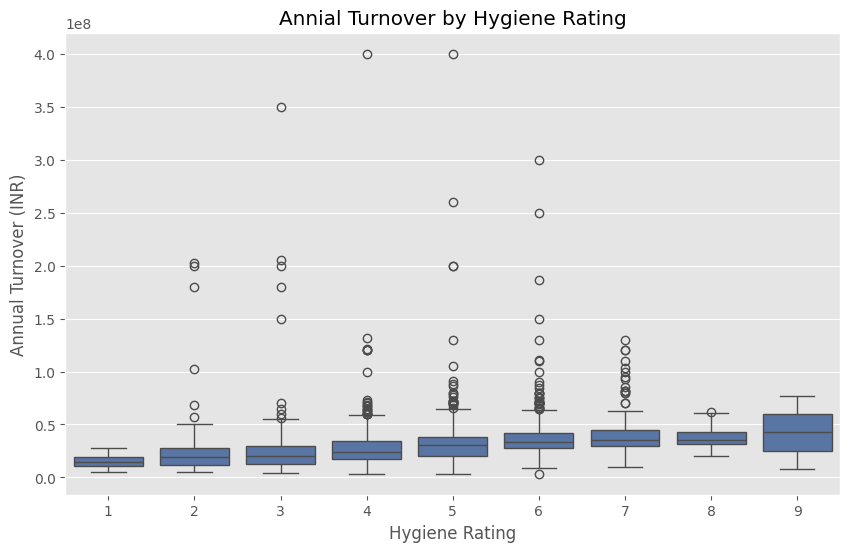

Food Rating


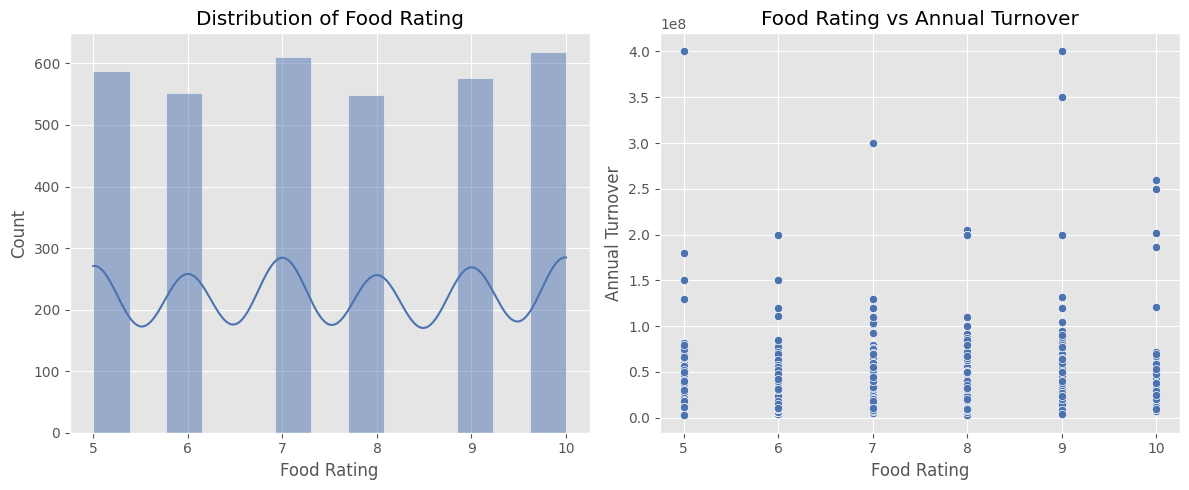

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


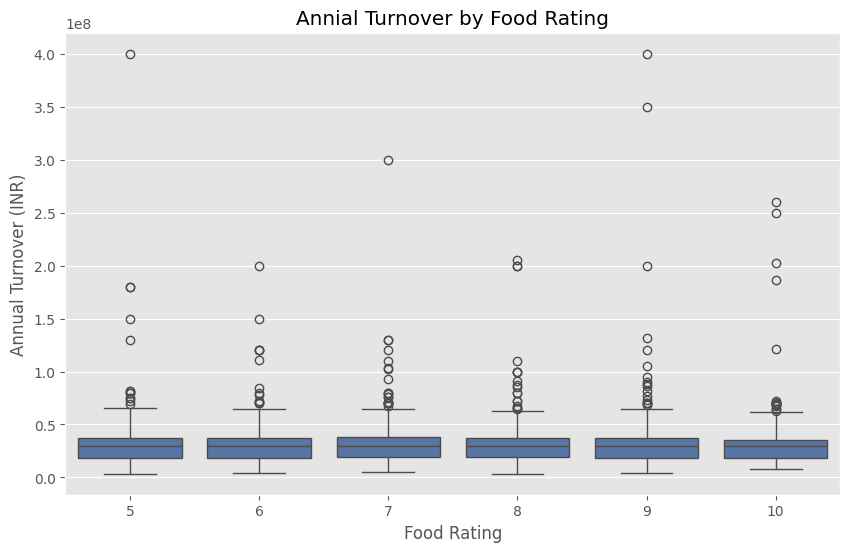

Overall Restaurant Rating


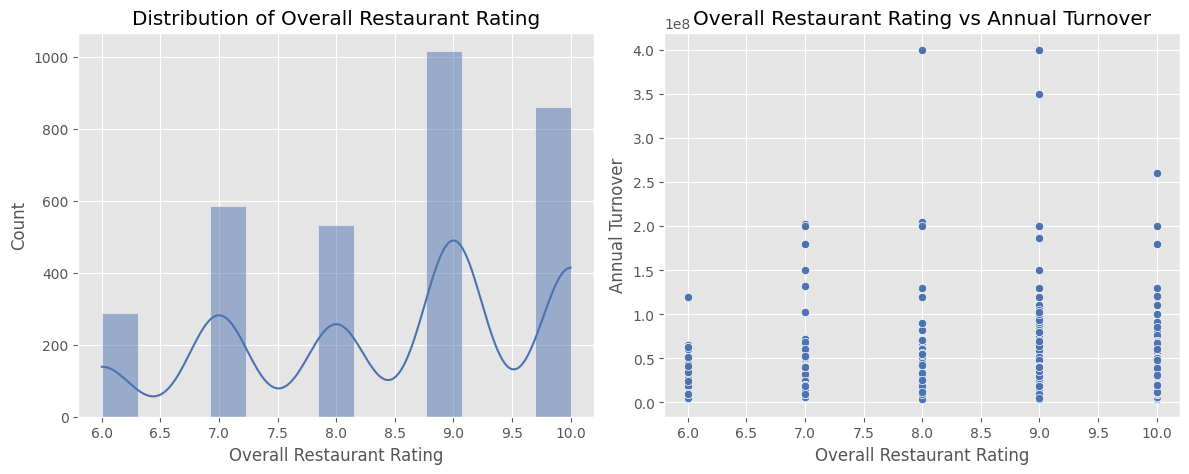

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


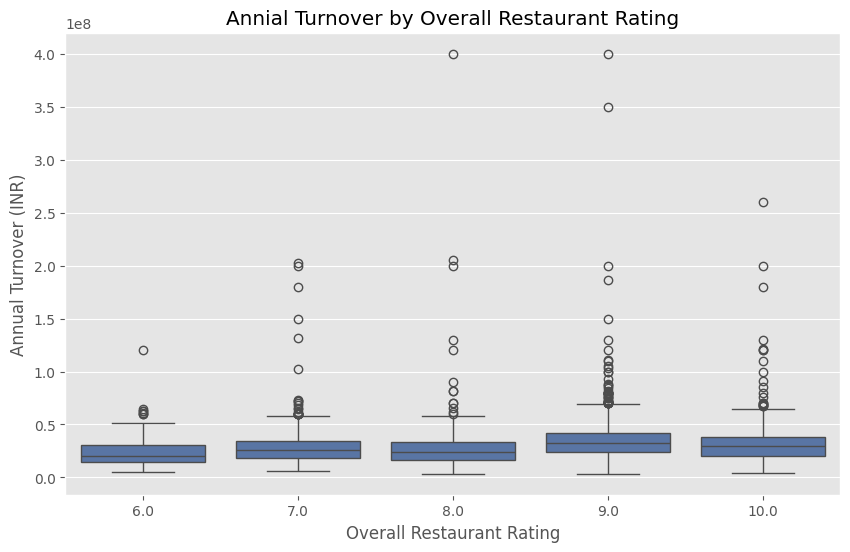

Live Music Rating


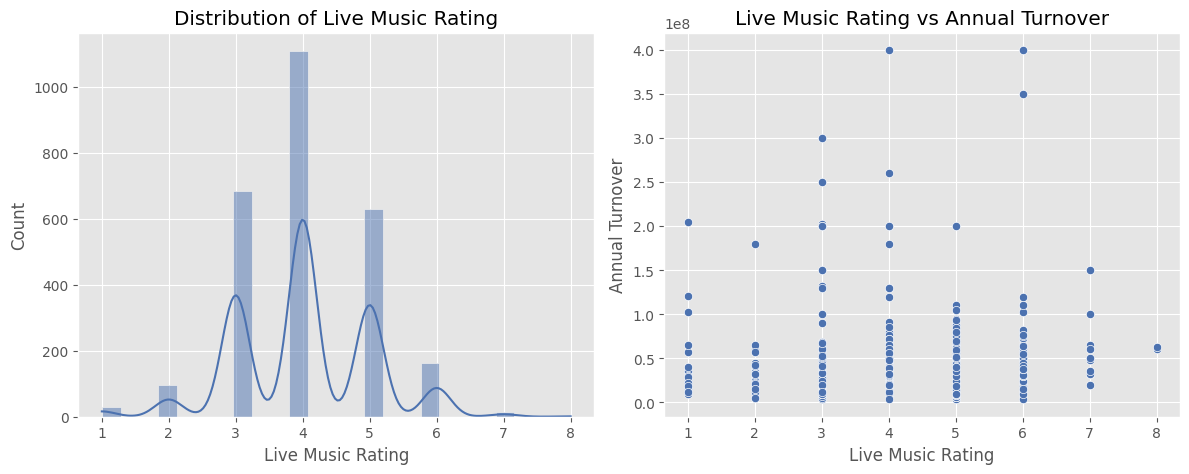

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


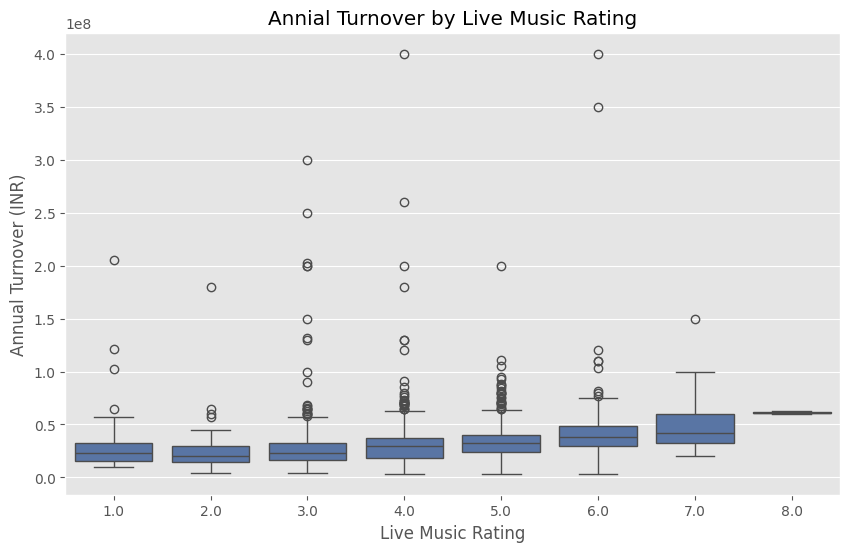

Comedy Gigs Rating


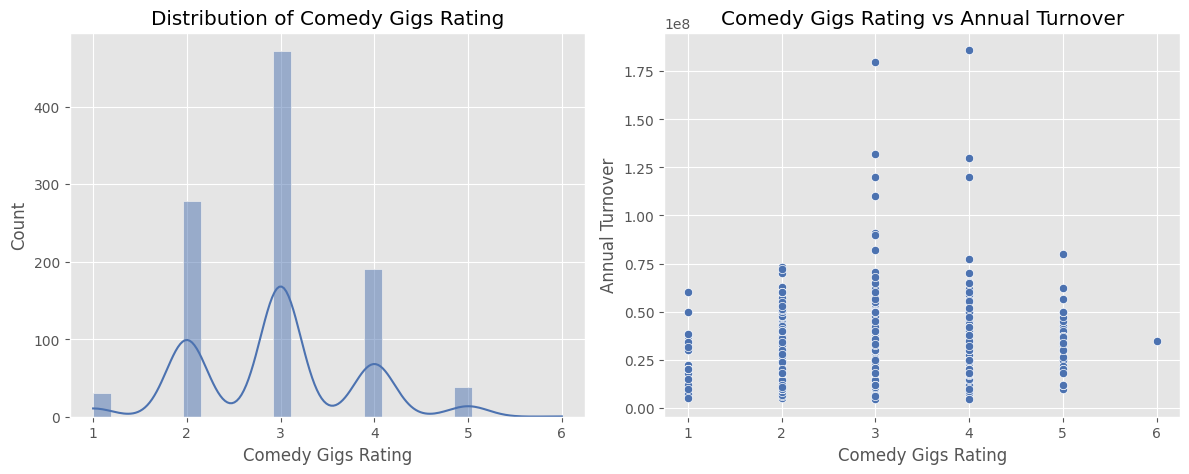

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


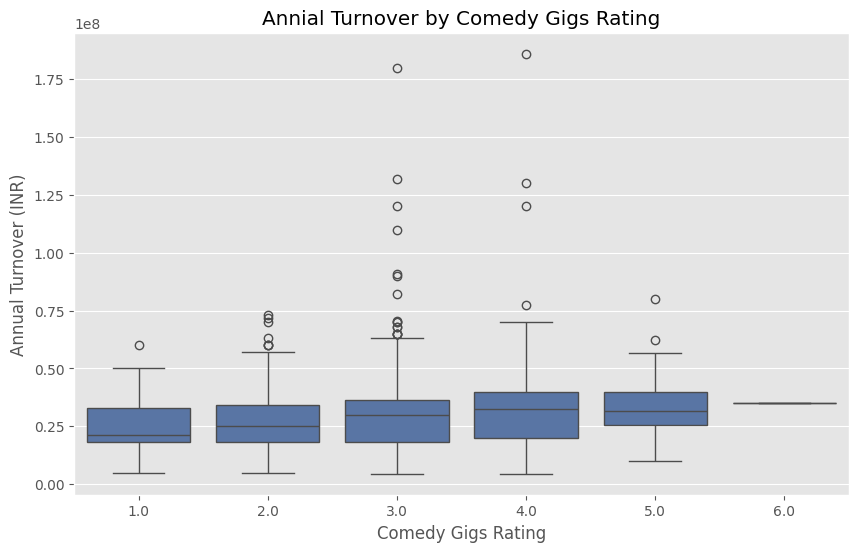

Value Deals Rating


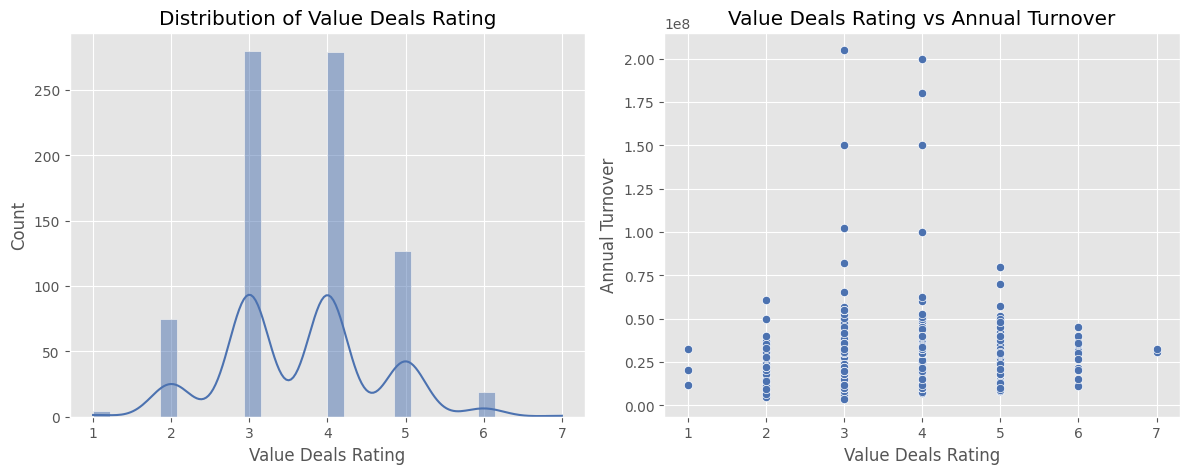

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


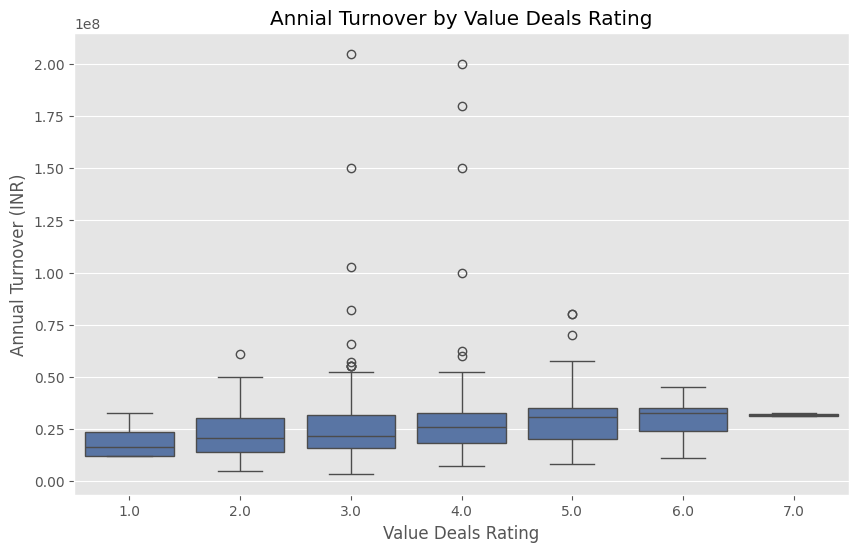

Live Sports Rating


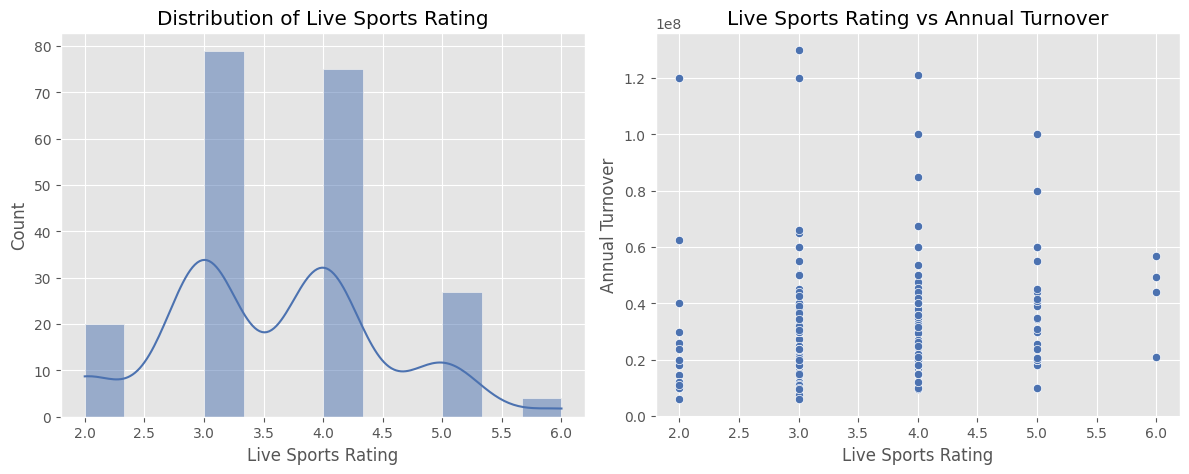

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


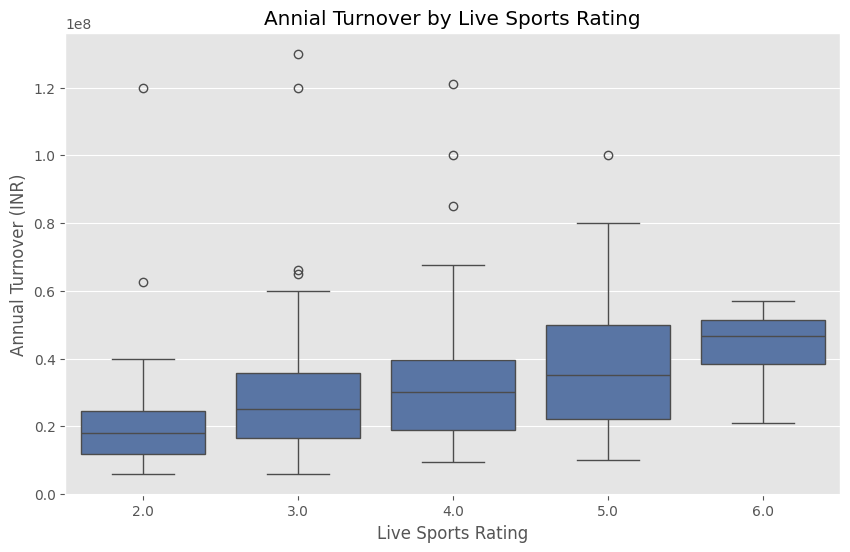

Ambience


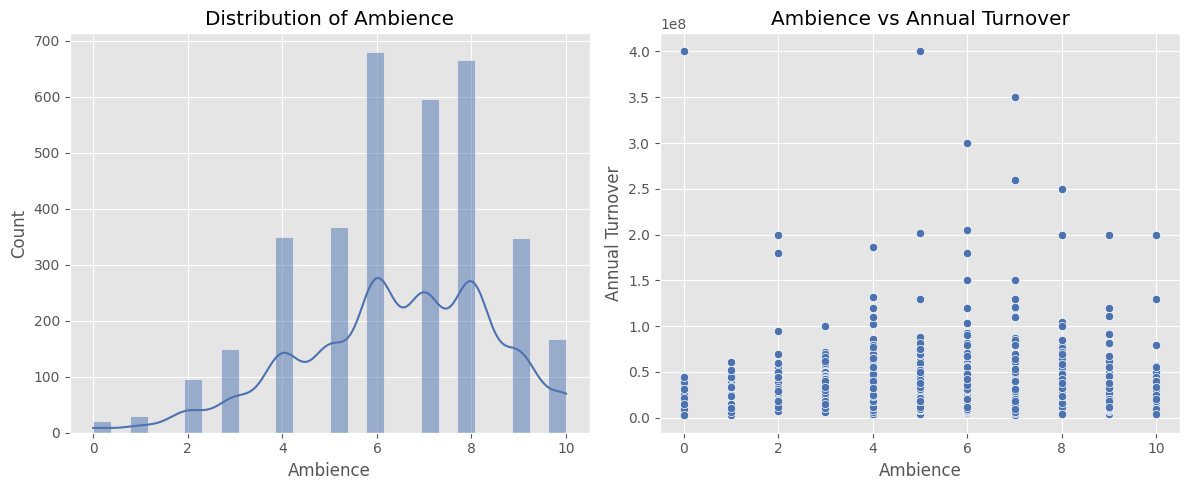

Lively


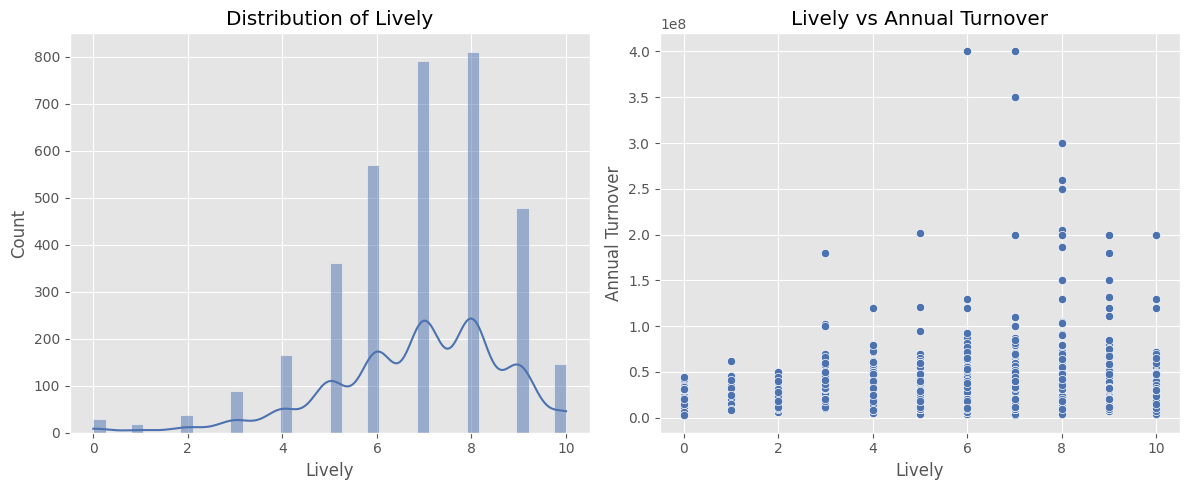

Service


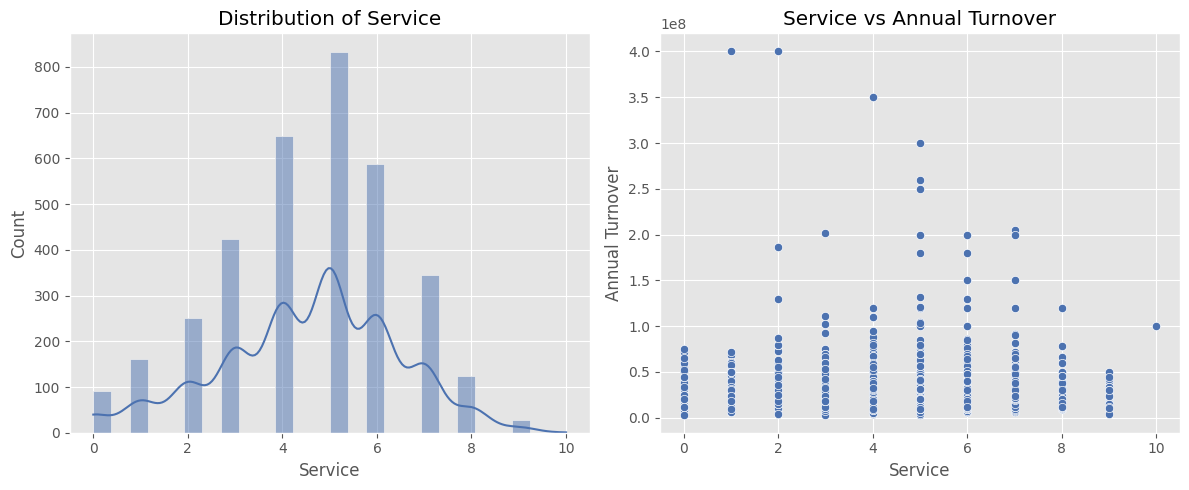

Comfortablility


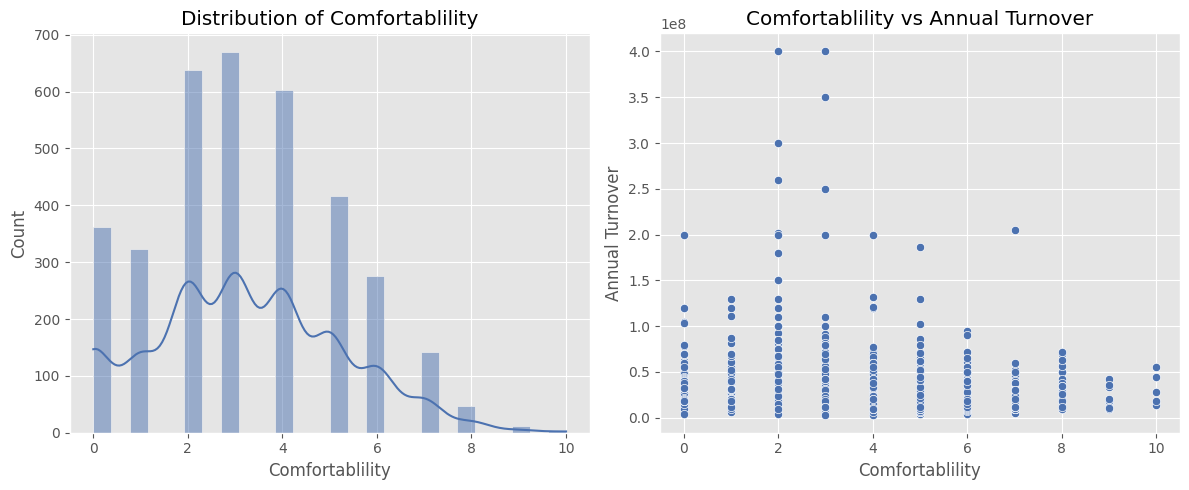

Privacy


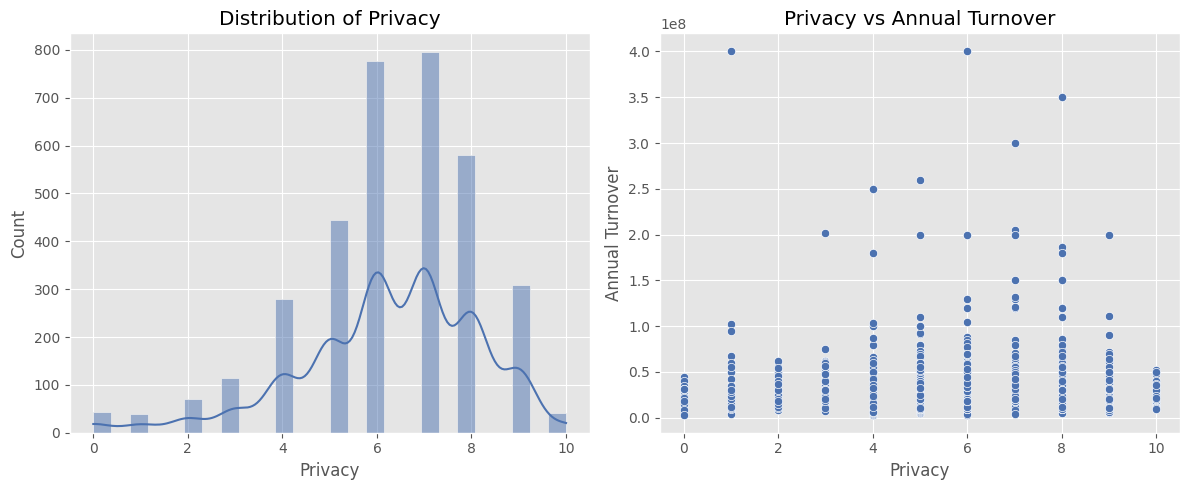

In [18]:
# distribution of each numerical feature
for feature in numerical_features:
    print("=" * 50)
    print(f'{feature}')
    print("=" * 50)

    plt.figure(figsize=(12, 5))

    # distribution
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')

    # relationship with target
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=feature, y='Annual Turnover', data=train_data)
    plt.title(f'{feature} vs Annual Turnover')

    plt.tight_layout()
    plt.show()

    # check if higher ratings correlate with higher turnover
    if 'Rating' in feature:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature, y='Annual Turnover', data=train_data)
        plt.title(f'Annial Turnover by {feature}')
        plt.ylabel('Annual Turnover (INR)')
        plt.show()

## Correlation Analysis

In [19]:
# select numerical columns for correlation analysis
correlation_data = train_data.select_dtypes(include=['int64', 'float64'])

In [20]:
# calculate correlation matrix
correlation_matrix = correlation_data.corr()

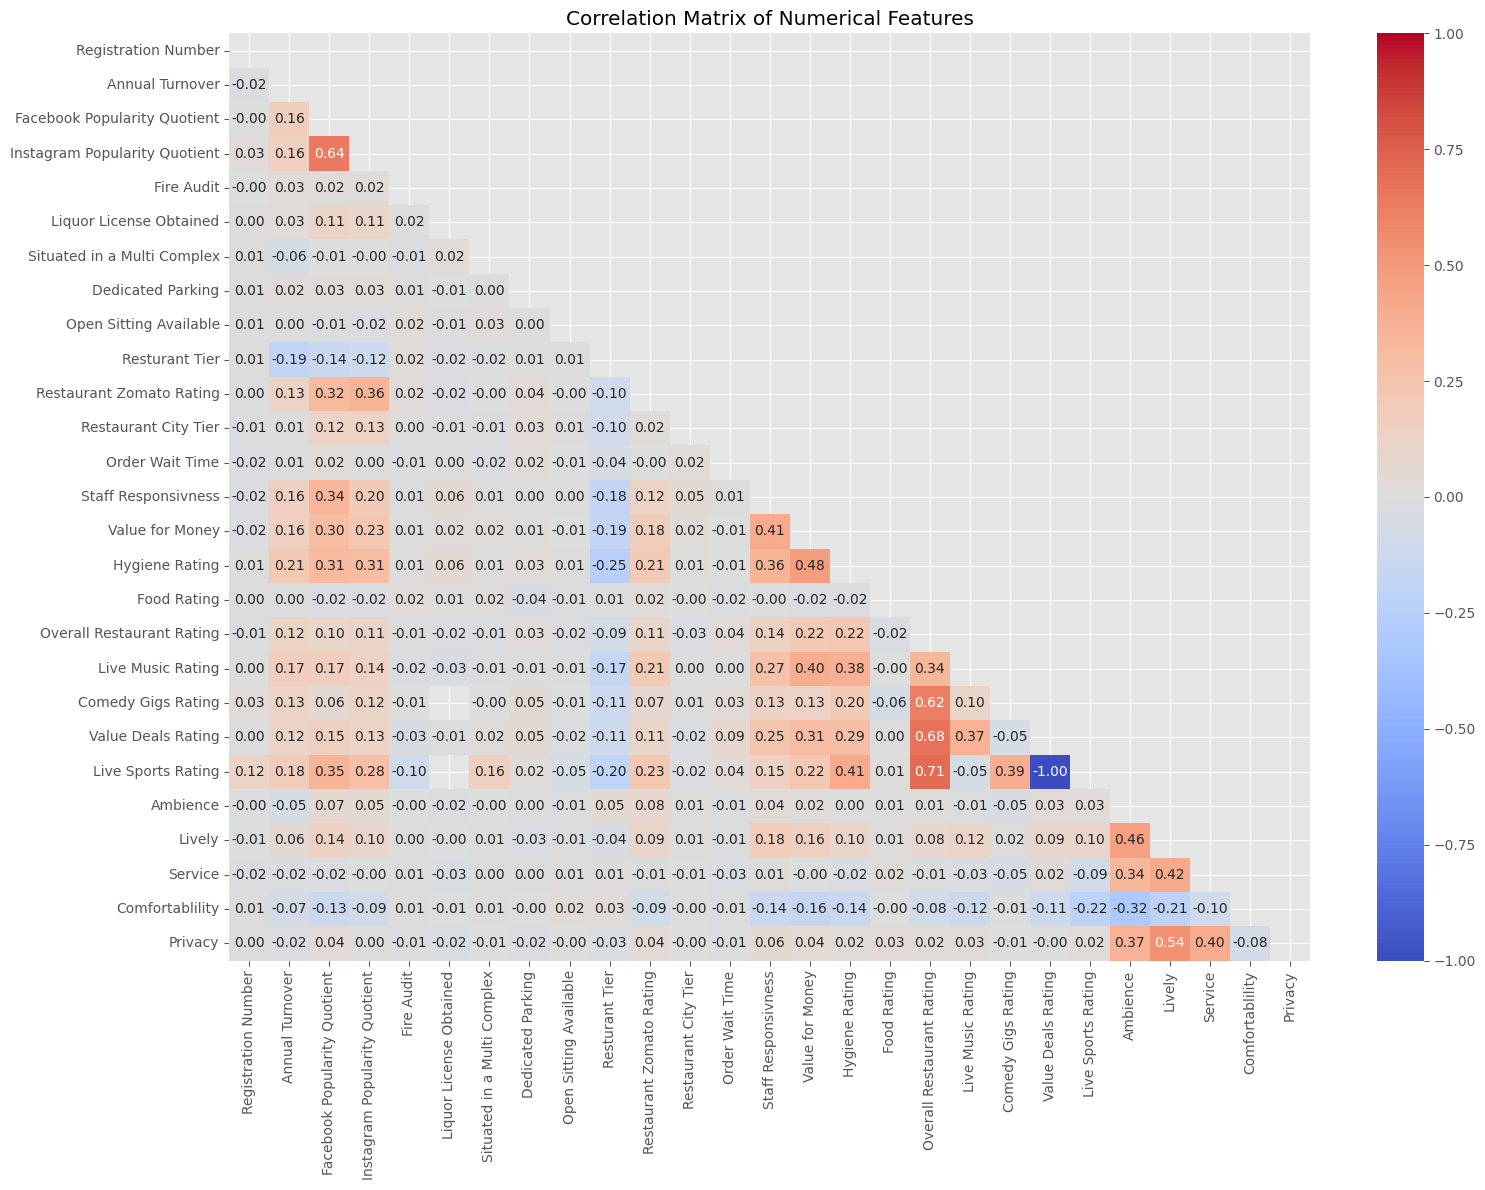

In [21]:
# plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [22]:
# features most correlated with Annual Turnover
turnover_correlation = correlation_matrix['Annual Turnover'].sort_values(ascending=False)
print('Correlation with Annual Turnover')
print(turnover_correlation)

Correlation with Annual Turnover
Annual Turnover                  1.000000
Hygiene Rating                   0.213869
Live Sports Rating               0.178295
Live Music Rating                0.169350
Facebook Popularity Quotient     0.164640
Instagram Popularity Quotient    0.163220
Value for Money                  0.162881
Staff Responsivness              0.156468
Comedy Gigs Rating               0.129354
Restaurant Zomato Rating         0.126454
Overall Restaurant Rating        0.119151
Value Deals Rating               0.116868
Lively                           0.056450
Fire Audit                       0.031070
Liquor License Obtained          0.025141
Dedicated Parking                0.024261
Restaurant City Tier             0.009952
Order Wait Time                  0.005916
Open Sitting Available           0.001076
Food Rating                      0.000302
Registration Number             -0.016768
Privacy                         -0.020820
Service                         -0.022945
A

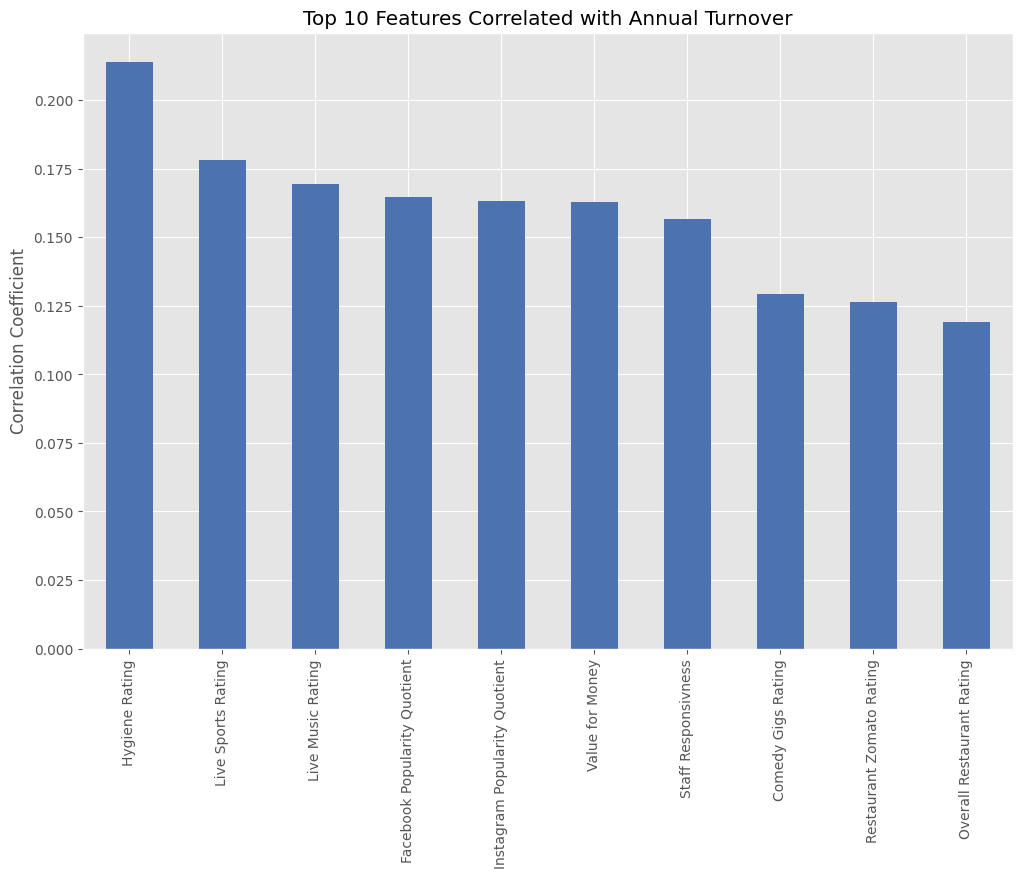

In [23]:
# plot top correlations with Annual Turnover
plt.figure(figsize=(12, 8))
turnover_correlation.drop('Annual Turnover').nlargest(10).plot(kind='bar')
plt.title('Top 10 Features Correlated with Annual Turnover')
plt.ylabel('Correlation Coefficient')
plt.show()

## Date Feature Analysis

In [24]:
# convert opening dat to datetime
train_data['Opening Day of Restaurant'] = pd.to_datetime(train_data['Opening Day of Restaurant'], errors='coerce')

/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_68056/2765434958.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['Opening Day of Restaurant'] = pd.to_datetime(train_data['Opening Day of Restaurant'], errors='coerce')


In [25]:
# extract useful components
train_data['Restaurant Age (Days)'] = (pd.Timestamp.now() - train_data['Opening Day of Restaurant']).dt.days
train_data['Opening Month'] = train_data['Opening Day of Restaurant'].dt.month
train_data['Opening Yesr'] = train_data['Opening Day of Restaurant'].dt.year
train_data['Opening Day of Week'] = train_data['Opening Day of Restaurant'].dt.dayofweek

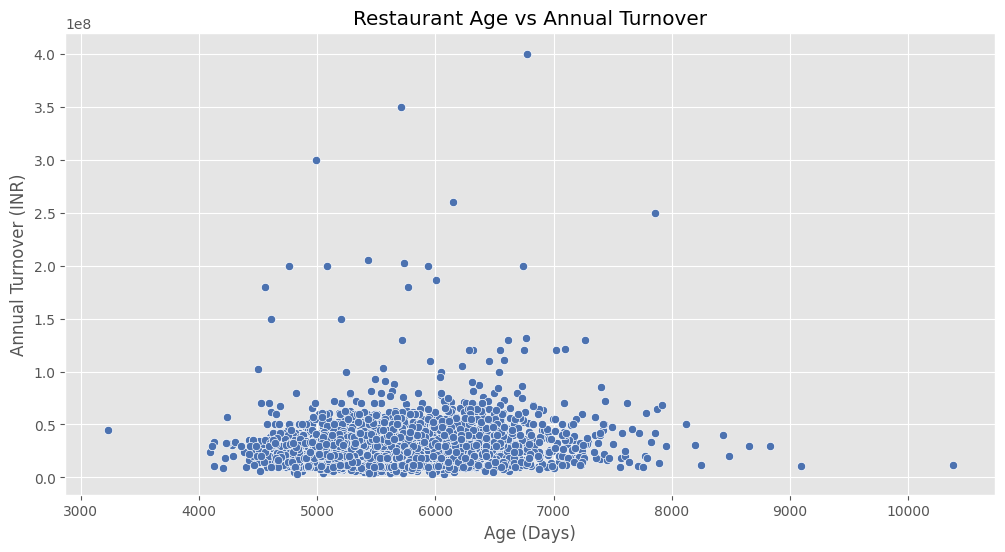

In [26]:
# analyze restaurant age vs turnover
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Restaurant Age (Days)', y='Annual Turnover', data=train_data)
plt.title('Restaurant Age vs Annual Turnover')
plt.xlabel('Age (Days)')
plt.ylabel('Annual Turnover (INR)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


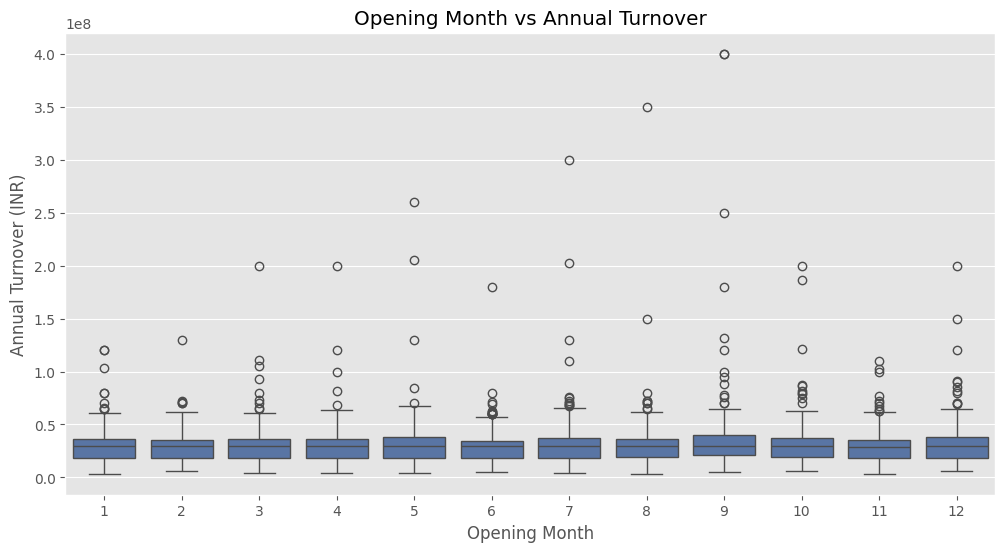

In [27]:
# analyze opening month vs turnover
plt.figure(figsize=(12, 6))
sns.boxplot(x='Opening Month', y='Annual Turnover', data=train_data)
plt.title('Opening Month vs Annual Turnover')
plt.xlabel('Opening Month')
plt.ylabel('Annual Turnover (INR)')
plt.show()

## Binary Features Analysis

In [28]:
# identify binary features
binary_features = [col for col in train_data.columns if
                   set(train_data[col].dropna().unique()).issubset({0, 1})]
print(f'Binary features: {binary_features}')

Binary features: ['Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Restaurant City Tier']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


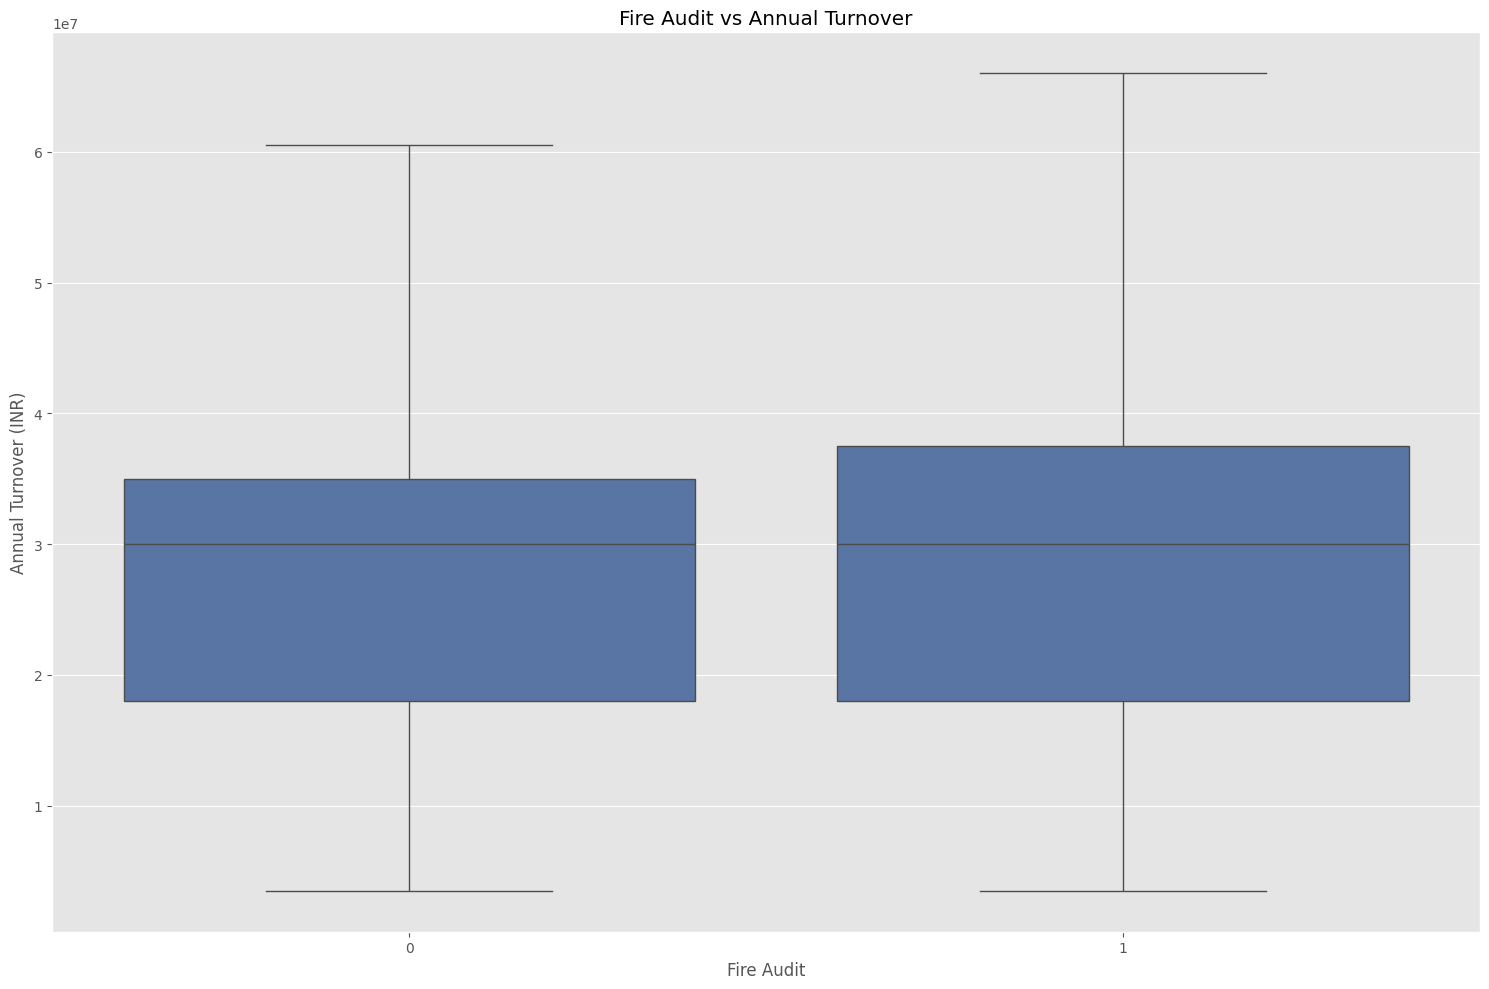

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


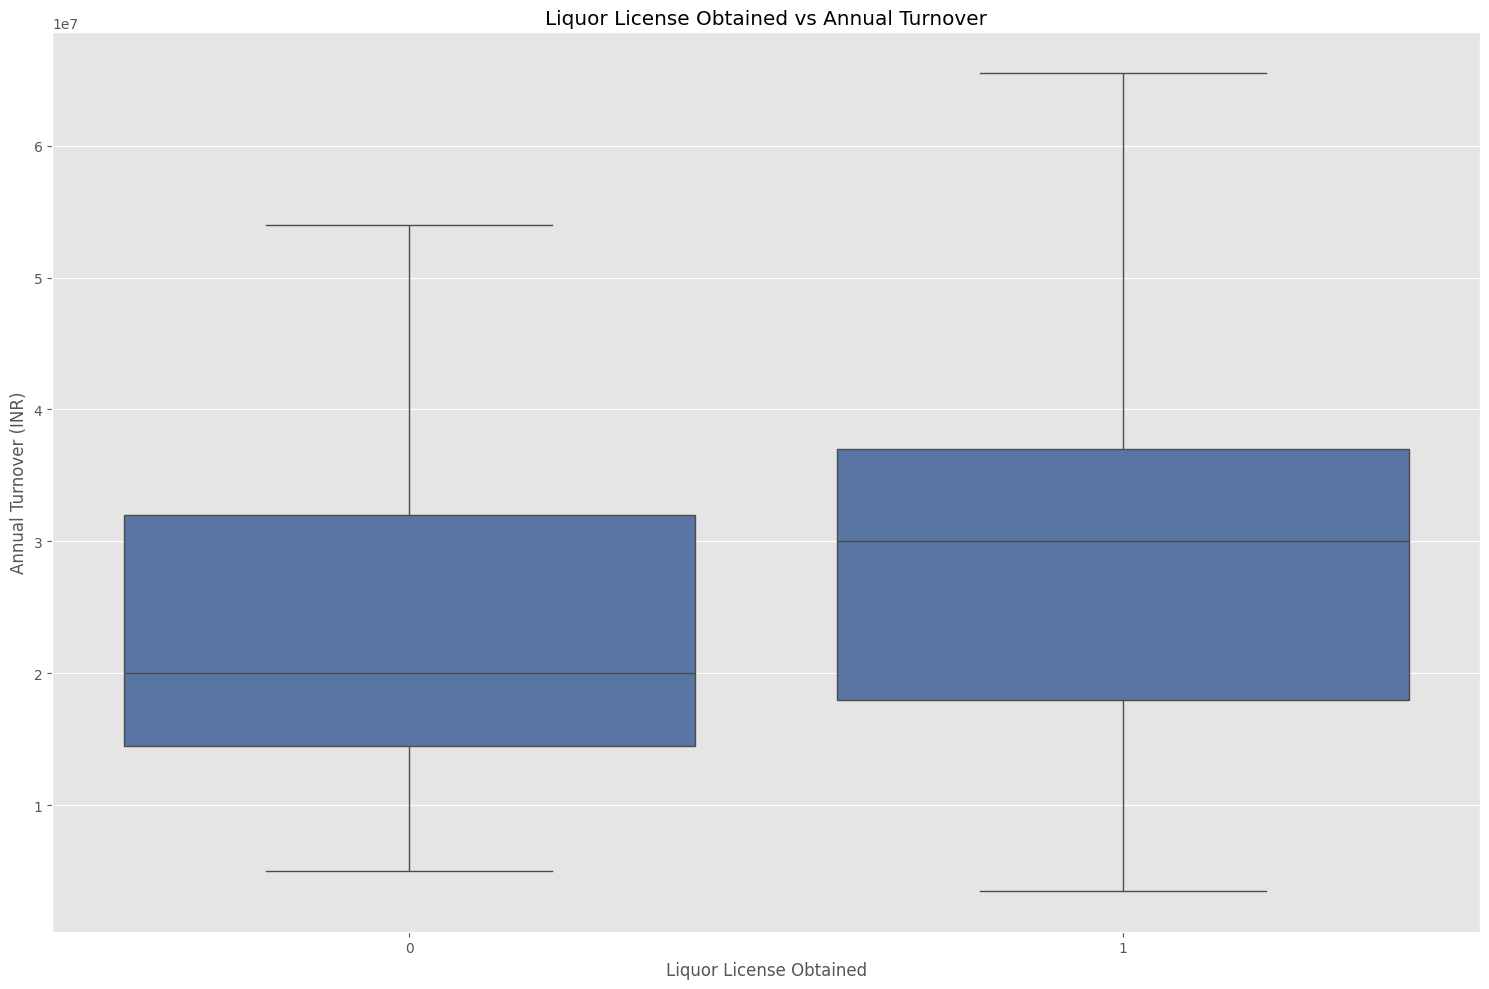

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


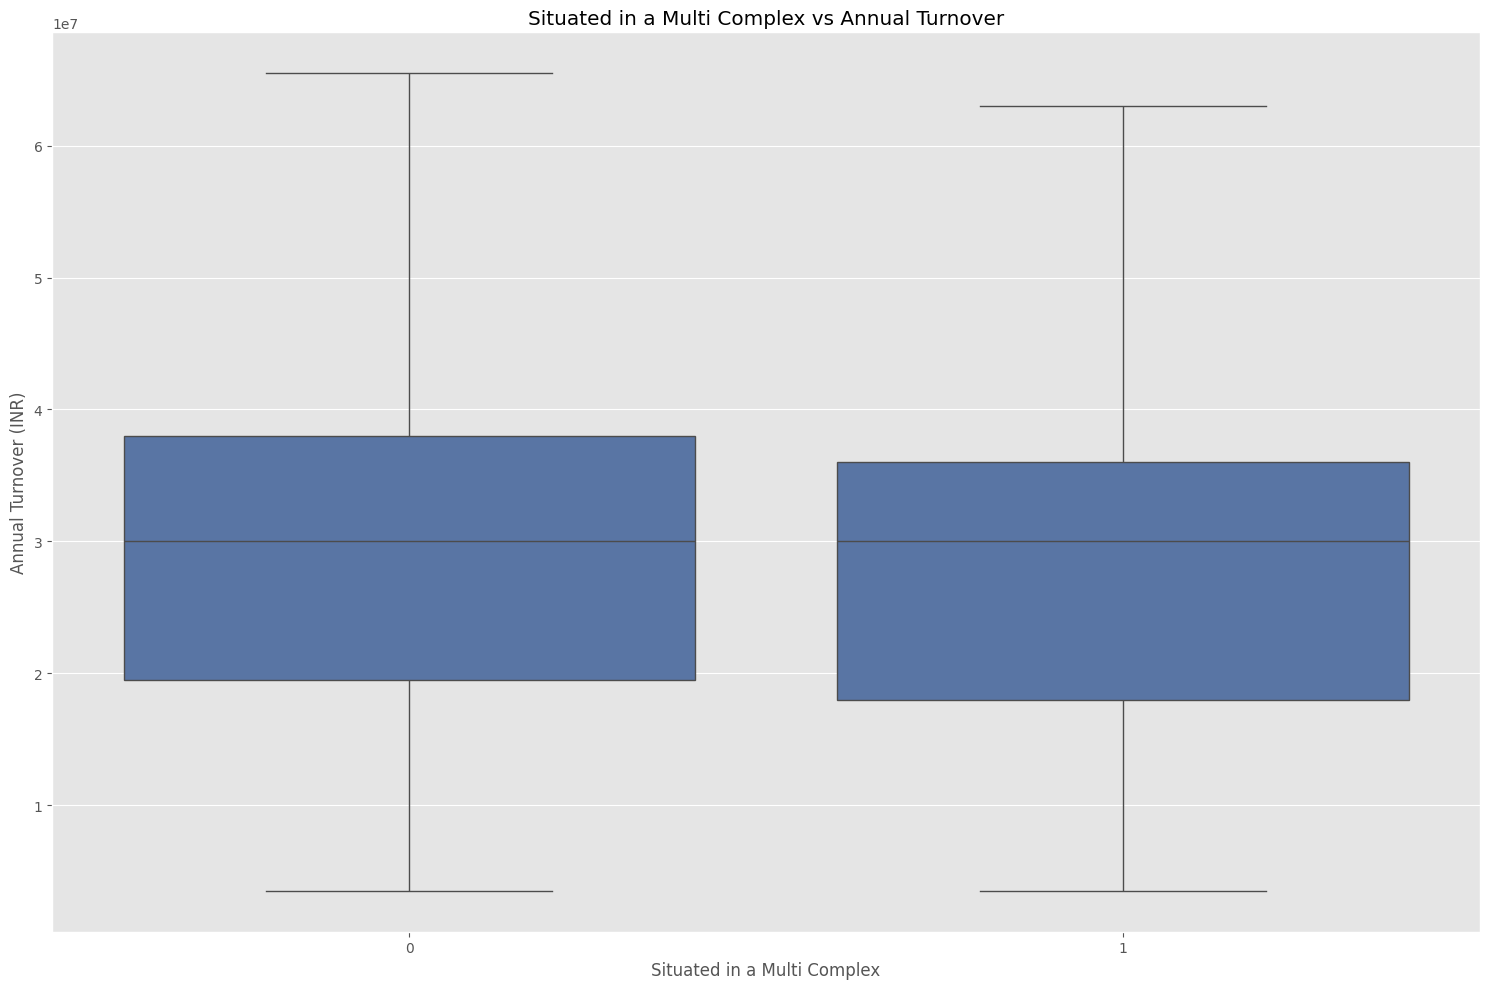

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


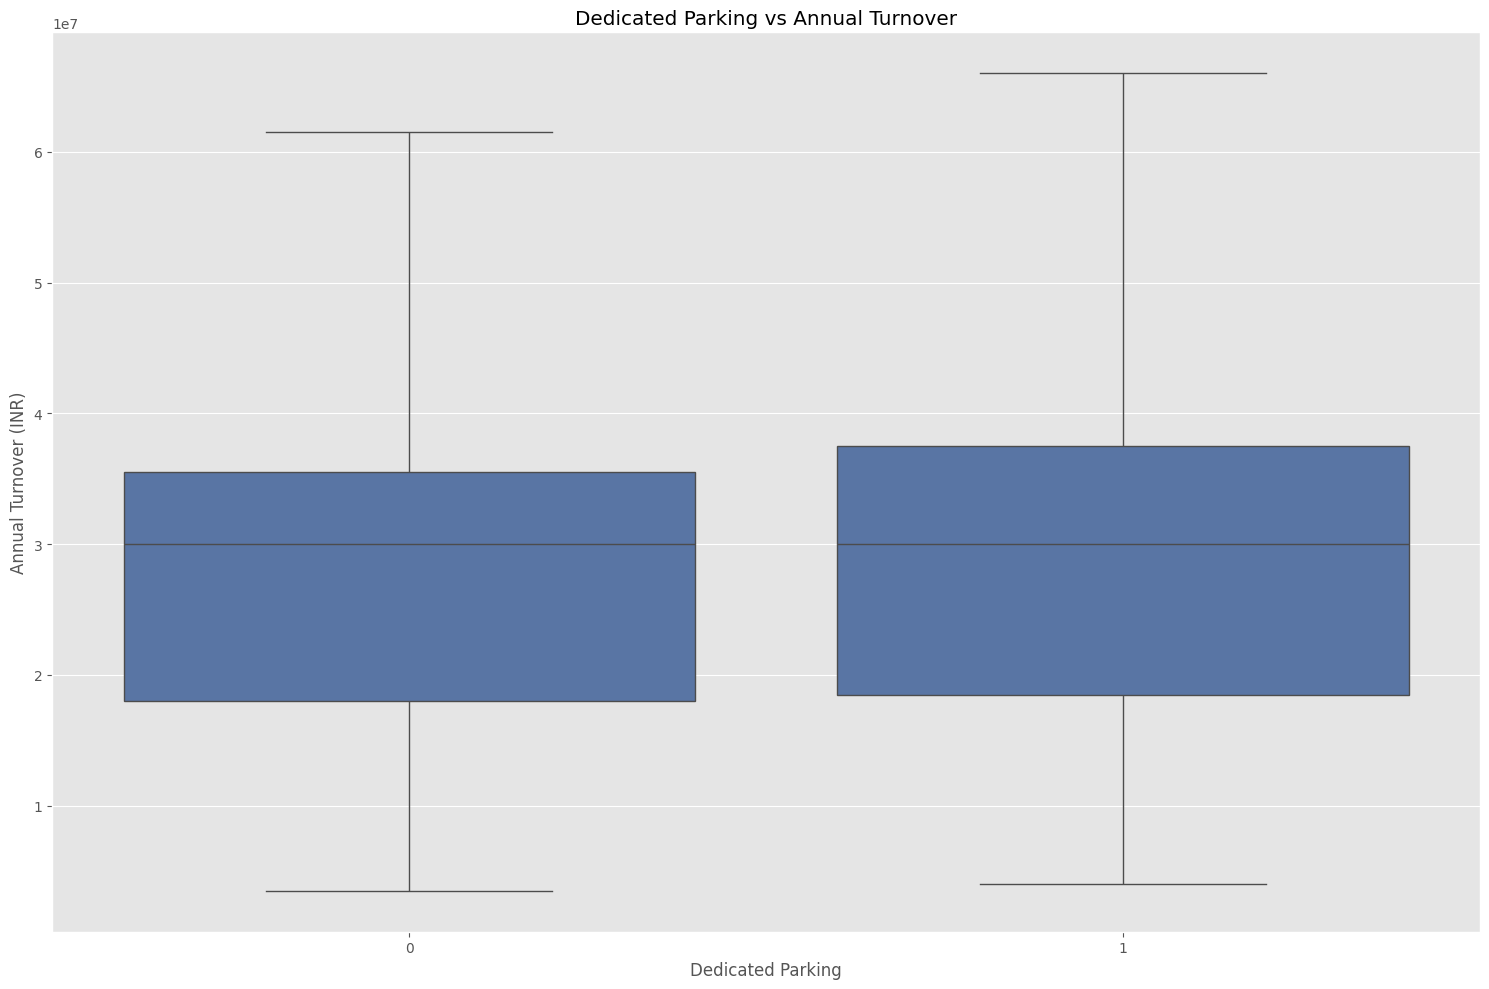

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


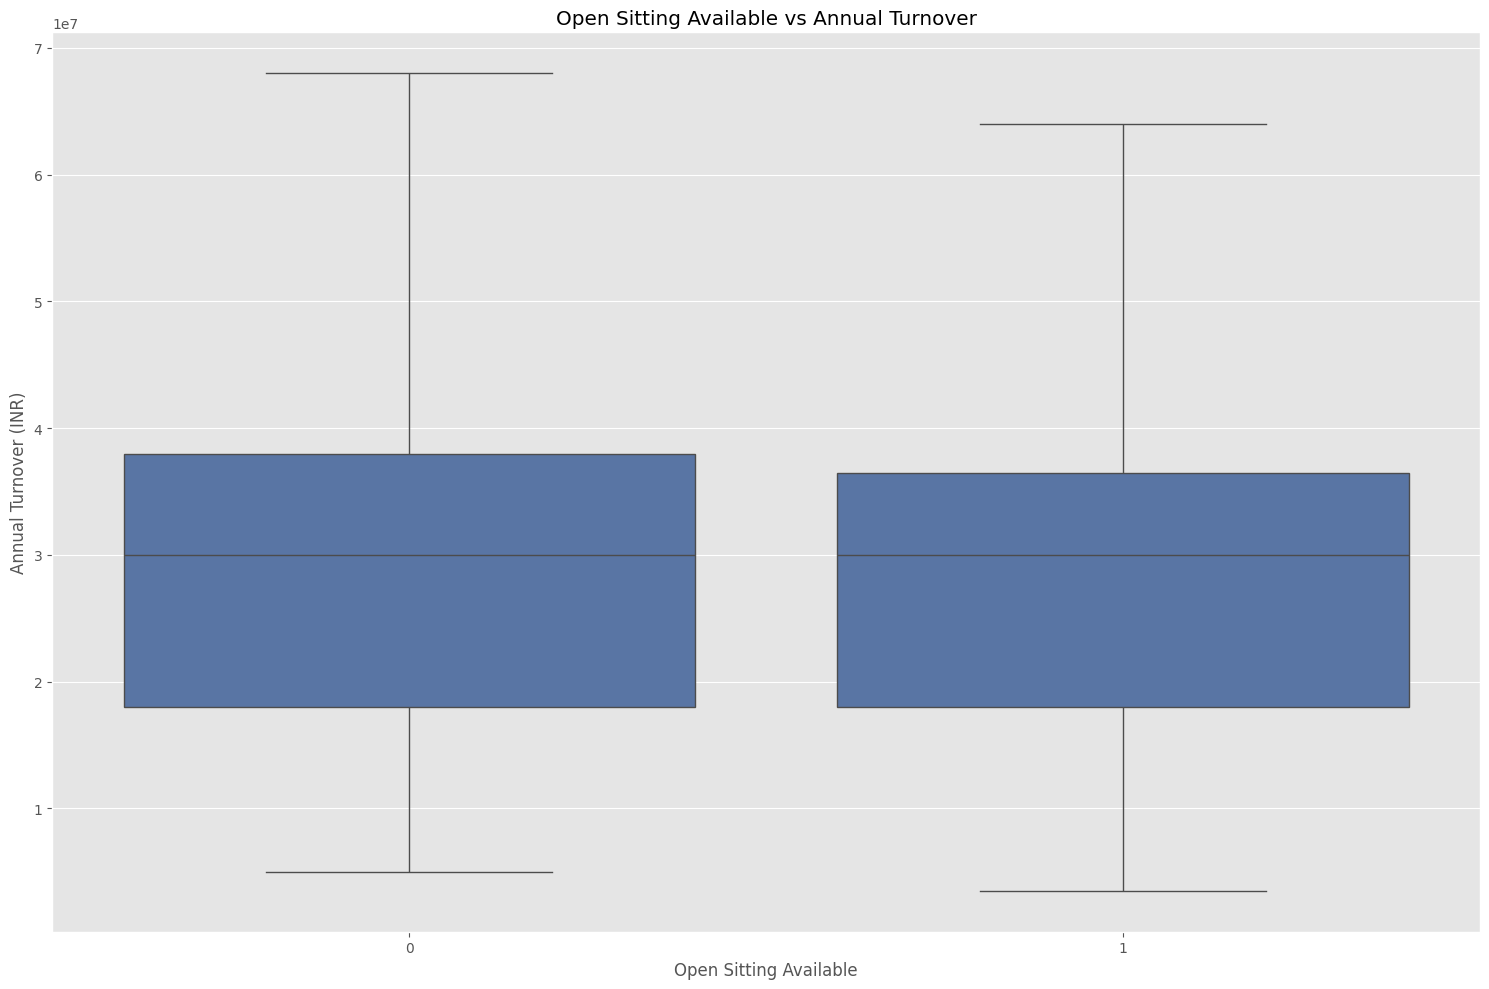

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


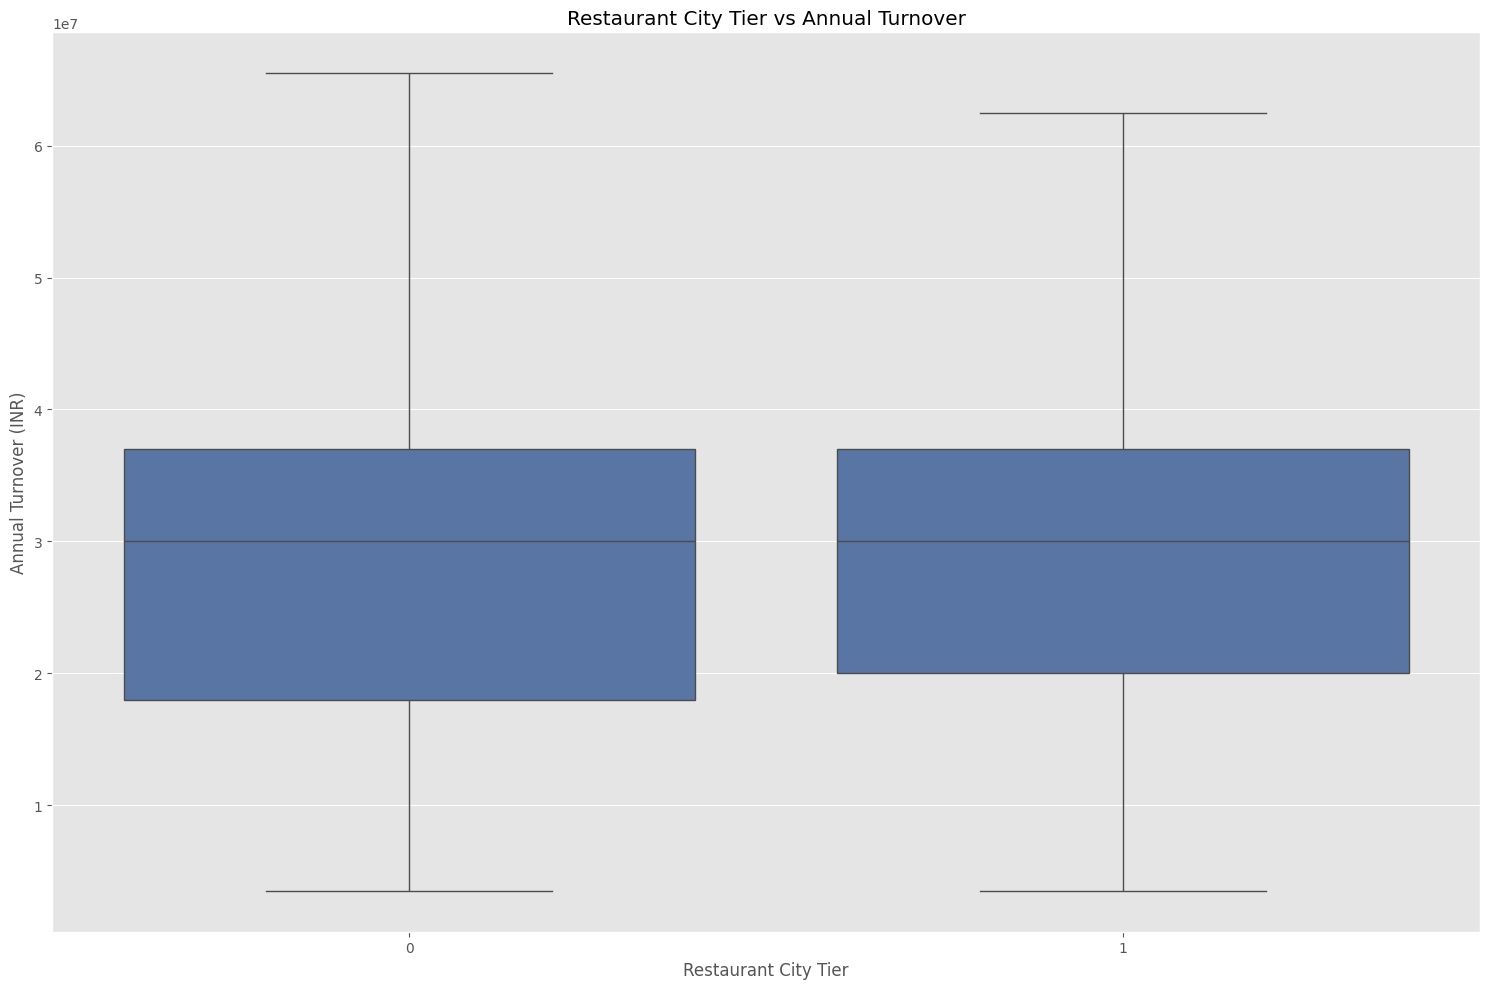

In [29]:
# analyze impact of binary features on turnover
for feature in binary_features:
    plt.figure(figsize=(15, 10))
    sns.boxplot(x=feature, y='Annual Turnover', data=train_data, showfliers=False)
    plt.title(f'{feature} vs Annual Turnover')
    plt.ylabel('Annual Turnover (INR)')
    plt.tight_layout()
    plt.show()

## Feature Interaction Analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

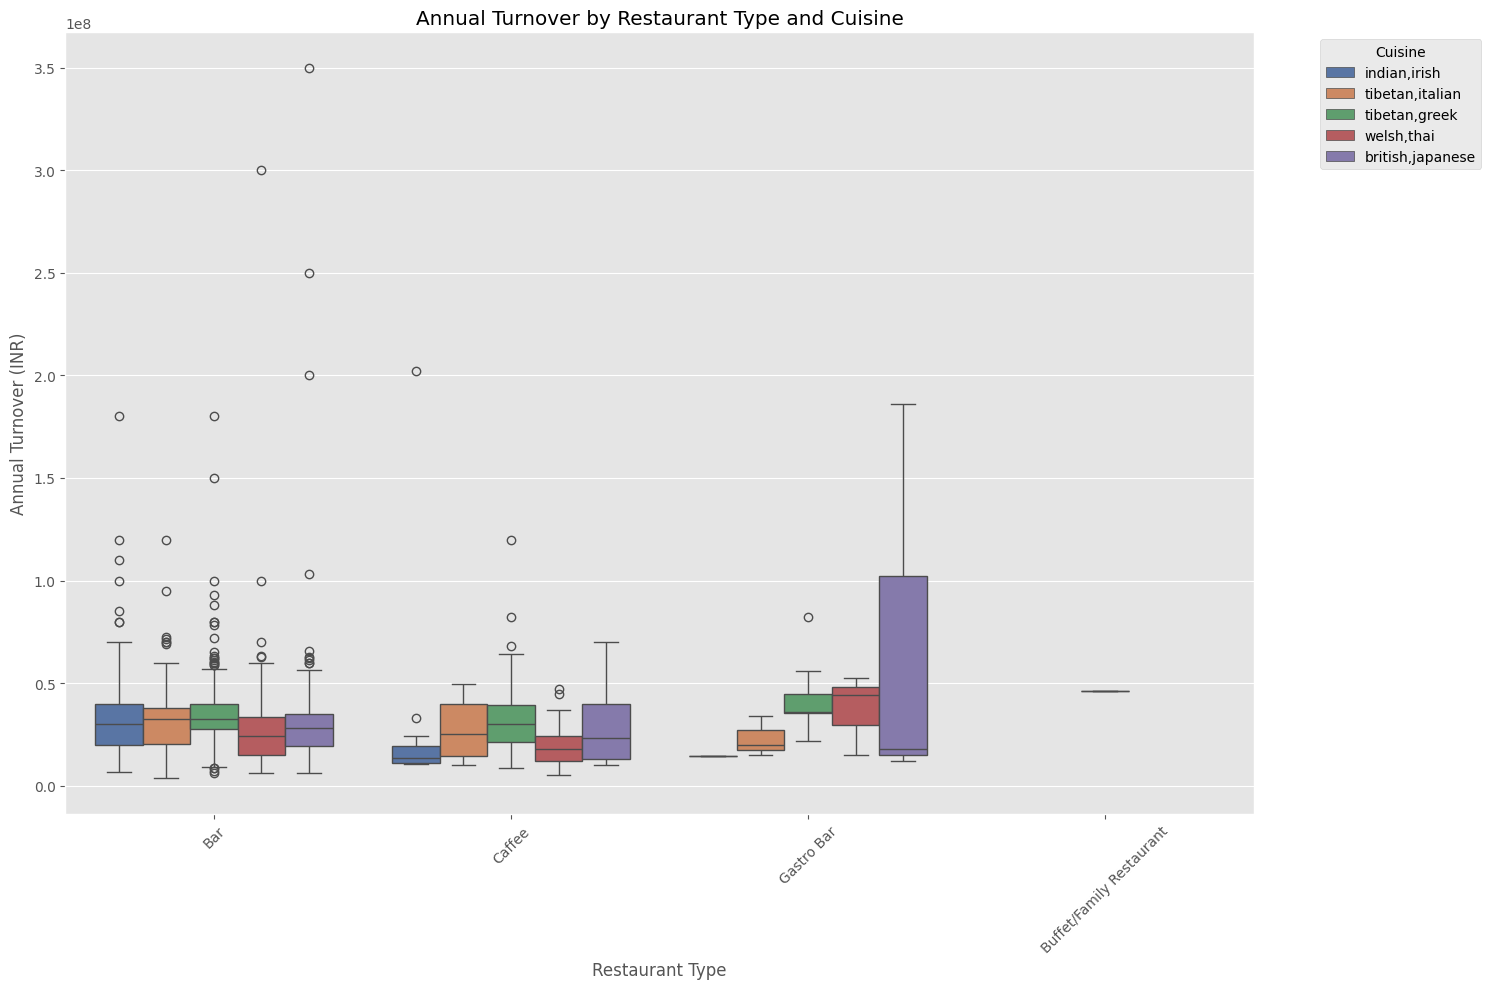

In [30]:
# interaction between Restaurant Type and Cuisine
if 'Restaurant Type' in train_data.columns and 'Cuisine' in train_data.columns:
    plt.figure(figsize=(15, 10))
    # get top 5 restaurant types and cuisines to avoid overcrowding
    top_types = train_data['Restaurant Type'].value_counts().nlargest(5).index
    top_cuisines = train_data['Cuisine'].value_counts().nlargest(5).index
    
    # filter data
    filtered_data = train_data[
        train_data['Restaurant Type'].isin(top_types) & 
        train_data['Cuisine'].isin(top_cuisines)
    ]
    
    # plot interaction
    sns.boxplot(x='Restaurant Type', y='Annual Turnover', hue='Cuisine', data=filtered_data)
    plt.title('Annual Turnover by Restaurant Type and Cuisine')
    plt.xlabel('Restaurant Type')
    plt.ylabel('Annual Turnover (INR)')
    plt.xticks(rotation=45)
    plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

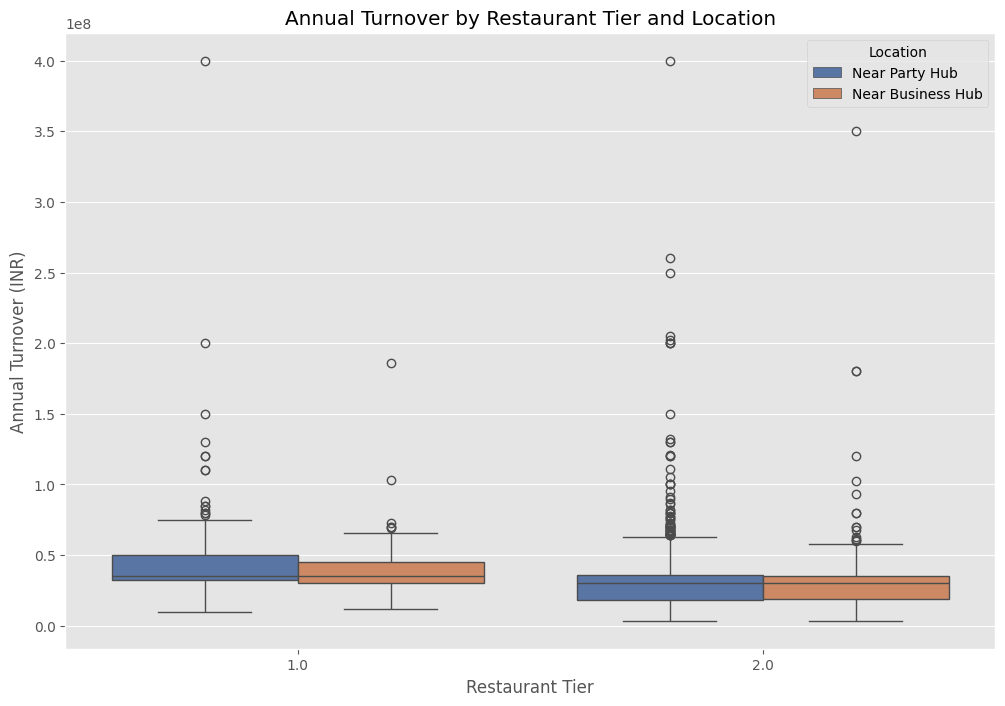

In [31]:
# interaction between Location and Restaurant Tier
if 'Restaurant Location' in train_data.columns and 'Resturant Tier' in train_data.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Resturant Tier', y='Annual Turnover', hue='Restaurant Location', data=train_data)
    plt.title('Annual Turnover by Restaurant Tier and Location')
    plt.xlabel('Restaurant Tier')
    plt.ylabel('Annual Turnover (INR)')
    plt.legend(title='Location')
    plt.show()

## Ratings Distribution

In [32]:
# collect all rating columns
rating_columns = [col for col in train_data.columns if 'Rating' in col]
print(f"Rating features: {rating_columns}")

Rating features: ['Restaurant Zomato Rating', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']


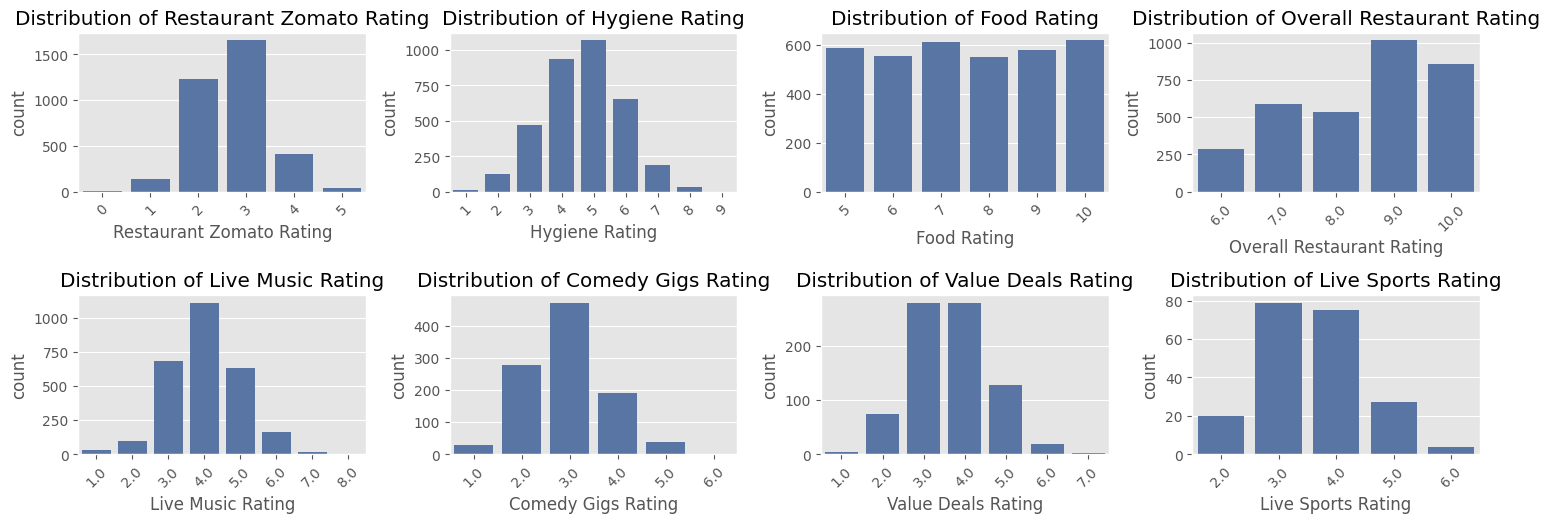

In [33]:
# distribution of ratings
plt.figure(figsize=(15, 10))
for i, col in enumerate(rating_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=train_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
    if i % 16 == 0 or i == len(rating_columns):
        plt.tight_layout()
        plt.show()
        if i < len(rating_columns):
            plt.figure(figsize=(15, 10))

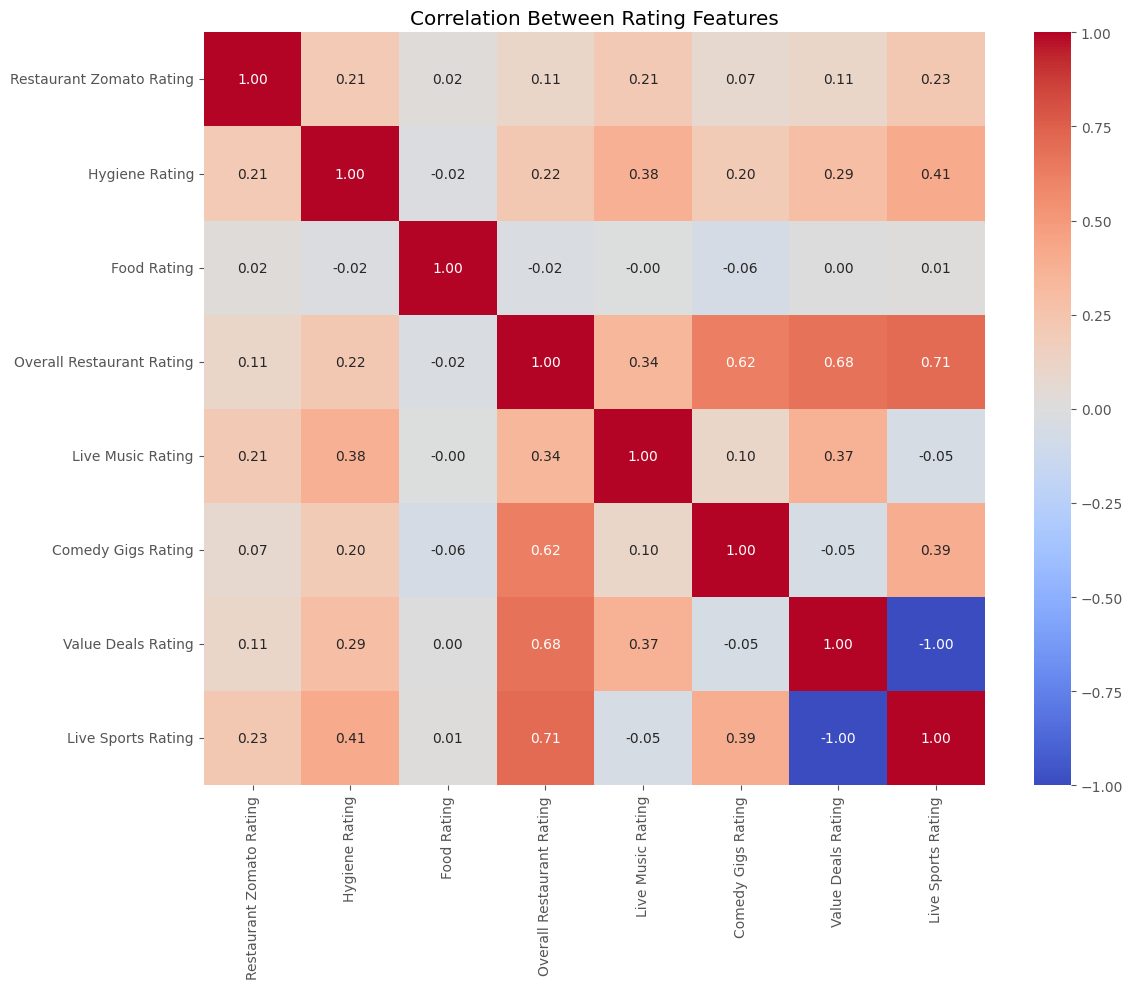

In [34]:
# correlation between ratings
ratings_corr = train_data[rating_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(ratings_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Rating Features')
plt.tight_layout()
plt.show()

## Outlier Detection

In [35]:
# function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [36]:
# check for outliers in Annual Turnover
turnover_outliers, lb, ub = detect_outliers(train_data, 'Annual Turnover')
print(f"Number of outliers in Annual Turnover: {len(turnover_outliers)}")
print(f"Lower bound: {lb}, Upper bound: {ub}")

Number of outliers in Annual Turnover: 95
Lower bound: -10500000.0, Upper bound: 65500000.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


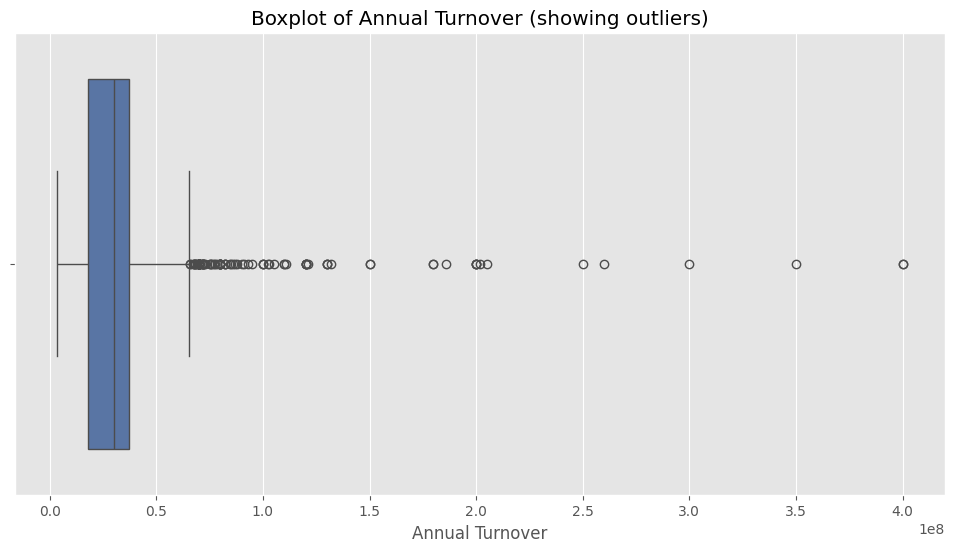

In [37]:
# visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['Annual Turnover'])
plt.title('Boxplot of Annual Turnover (showing outliers)')
plt.show()

In [38]:
# check characteristics of restaurants with outlier turnovers
if len(turnover_outliers) > 0:
    print("\nCharacteristics of restaurants with outlier turnovers:")
    for col in categorical_features:
        print(f"\n{col} distribution in outliers:")
        print(turnover_outliers[col].value_counts(normalize=True) * 100)


Characteristics of restaurants with outlier turnovers:

Cuisine distribution in outliers:
Cuisine
turkish,nigerian       15.789474
tibetan,greek          13.684211
indian,irish           10.526316
tibetan,italian         7.368421
british,japanese        7.368421
algerian,korean         6.315789
turkish,sapnish         6.315789
japanese,thai           5.263158
hawaiian,latvian        4.210526
welsh,thai              3.157895
irish,belgian           3.157895
polish,jewish           3.157895
algerian,belgian        3.157895
cuban,british           2.105263
algerian,algerian       2.105263
peruvian,cuban          2.105263
chinese,salvadorian     1.052632
nigerian,cajun          1.052632
british,belgian         1.052632
swedish,greek           1.052632
Name: proportion, dtype: float64

City distribution in outliers:
City
Bangalore        22.105263
Noida            10.526316
-1                9.473684
Gurgaon           8.421053
Pune              6.315789
Hyderabad         5.263158
New Delhi